https://www.kaggle.com/mirichoi0218/classification-diabetes-or-not-with-basic-12ml

# https://www.biorxiv.org/content/10.1101/643833v2.full  //paper to check

https://rpubs.com/rzezela77/346228

https://rstudio-pubs-static.s3.amazonaws.com/171586_2dbcd1e711cb4e9f81278694268d3b48.html

# https://github.com/uman95/Master-Thesis

# https://www.kaggle.com/avehtari/bayesian-logistic-regression-with-rstanarm

# https://rpubs.com/jayarapm/PIMAIndianWomenDiabetes   #mustcheck

# https://towardsdatascience.com/decision-tree-classification-of-diabetes-among-the-pima-indian-community-in-r-using-mlr-778ae2f87c69

In [1]:
diabetes <- read.csv("diabetes.csv", header=T, stringsAsFactors=F)


In [2]:
library(mlbench) # Diabetes dataset
library(rpart) # Decision tree
library(rpart.plot) # Plotting decision tree
library(caret) # Accuracy estimation
library(Metrics) # For diferent model evaluation metrics

Warning message:
"package 'mlbench' was built under R version 3.6.3"Warning message:
"package 'rpart.plot' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"

ERROR: Error in library(Metrics): there is no package called 'Metrics'


In [4]:
train_index = sample(c(T, F), nrow(diabetes), prob = c(0.8, 0.2), replace = TRUE)
train_data <- diabetes[train_index,]
test_data <- diabetes[!train_index,]

In [6]:
fit <- glm(formula = Outcome ~ ., family = binomial, data = train_data)
summary(fit)


Call:
glm(formula = Outcome ~ ., family = binomial, data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5211  -0.7218  -0.4103   0.7366   2.9976  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.3211531  0.7997570 -10.405  < 2e-16 ***
Pregnancies               0.1315893  0.0367596   3.580 0.000344 ***
Glucose                   0.0357029  0.0042532   8.394  < 2e-16 ***
BloodPressure            -0.0143281  0.0062250  -2.302 0.021352 *  
SkinThickness            -0.0053561  0.0077255  -0.693 0.488121    
Insulin                  -0.0005114  0.0009920  -0.516 0.606174    
BMI                       0.0880709  0.0170994   5.151  2.6e-07 ***
DiabetesPedigreeFunction  0.7417981  0.3331338   2.227 0.025966 *  
Age                       0.0170713  0.0108738   1.570 0.116428    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to 

In [7]:
test.predict = ifelse(predict(fit, test_data, type = "response") > 0.5, "Yes", "No")
cm1 <- table(test.predict, test_data$Outcome)
sum(diag(cm1)) / sum(cm1)

[1] 0.7682927

In [10]:
if(!require(nnet)) install.packages("neuralnet", repos = "http://cran.us.r-project.org")

Loading required package: nnet


In [11]:
library(nnet)

In [16]:
library("neuralnet")

Warning message:
"package 'neuralnet' was built under R version 3.6.3"

In [20]:
train_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0
8,10,115,0,0,0,35.3,0.134,29,0
9,2,197,70,45,543,30.5,0.158,53,1
10,8,125,96,0,0,0.0,0.232,54,1
11,4,110,92,0,0,37.6,0.191,30,0
13,10,139,80,0,0,27.1,1.441,57,0
14,1,189,60,23,846,30.1,0.398,59,1


In [21]:
NN = neuralnet(Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age, data=train_data, hidden = 3 , linear.output = TRUE, act.fct="logistic" )

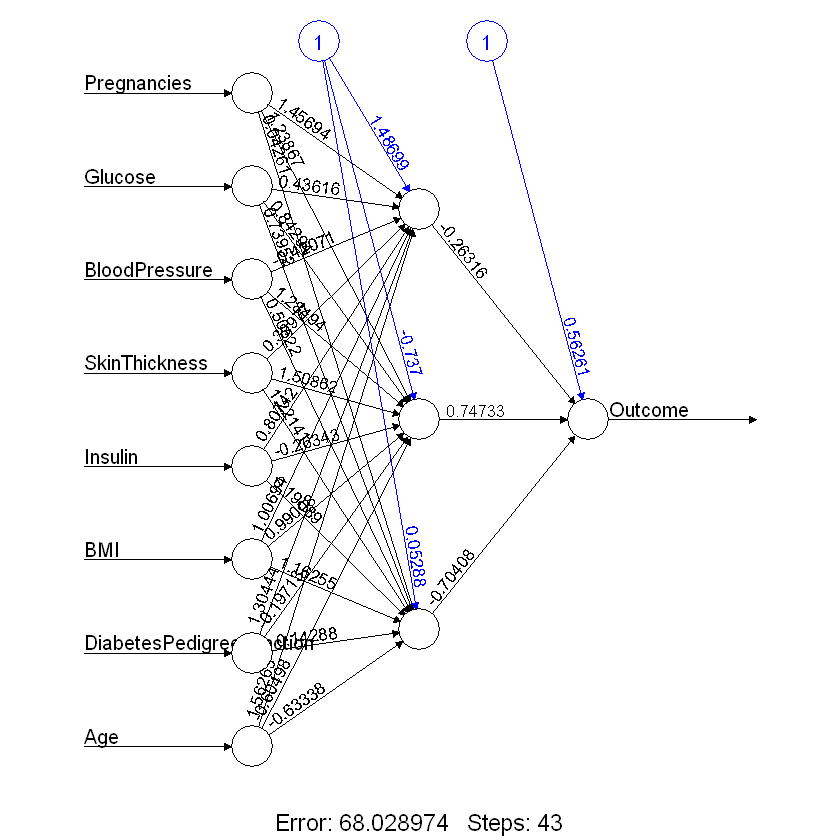

In [22]:
plot(NN, rep="best")

In [26]:
predicted.nn.values <- compute(NN,test_data[,1:8])

In [28]:
plot(NN)

In [29]:
summarization = confusionMatrix(as.factor(round(predicted.nn.values$net.result)), as.factor(test_data[,9]))
summarization 

Warning message in confusionMatrix.default(as.factor(round(predicted.nn.values$net.result)), :
"Levels are not in the same order for reference and data. Refactoring data to match."

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 103  61
         1   0   0
                                          
               Accuracy : 0.628           
                 95% CI : (0.5492, 0.7021)
    No Information Rate : 0.628           
    P-Value [Acc > NIR] : 0.5349          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : 1.564e-14       
                                          
            Sensitivity : 1.000           
            Specificity : 0.000           
         Pos Pred Value : 0.628           
         Neg Pred Value :   NaN           
             Prevalence : 0.628           
         Detection Rate : 0.628           
   Detection Prevalence : 1.000           
      Balanced Accuracy : 0.500           
                                          
       'Positive' Class : 0               
                              

In [14]:
summarization = confusionMatrix(as.factor(round(predicted.nn.values$net.result)), as.factor(validation[,9]))
summarization 

ERROR: Error in predict.nnet(fit2, test_data, type = "class"): inappropriate fit for class


In [57]:
set.seed(123)
index <- sample(2, nrow(diabetes), prob = c(0.8, 0.2), replace = TRUE)
Diabetes_train <- diabetes[index==1, ] # Train data
Diabetes_test <- diabetes[index == 2, ] # Test data

In [58]:
print(dim(Diabetes_train))
print(dim(Diabetes_test))

[1] 613   9
[1] 155   9


In [59]:
# Train a decision tree model
Diabetes_model <- rpart(formula = Outcome ~., 
                        data = Diabetes_train, 
                        method = "class")

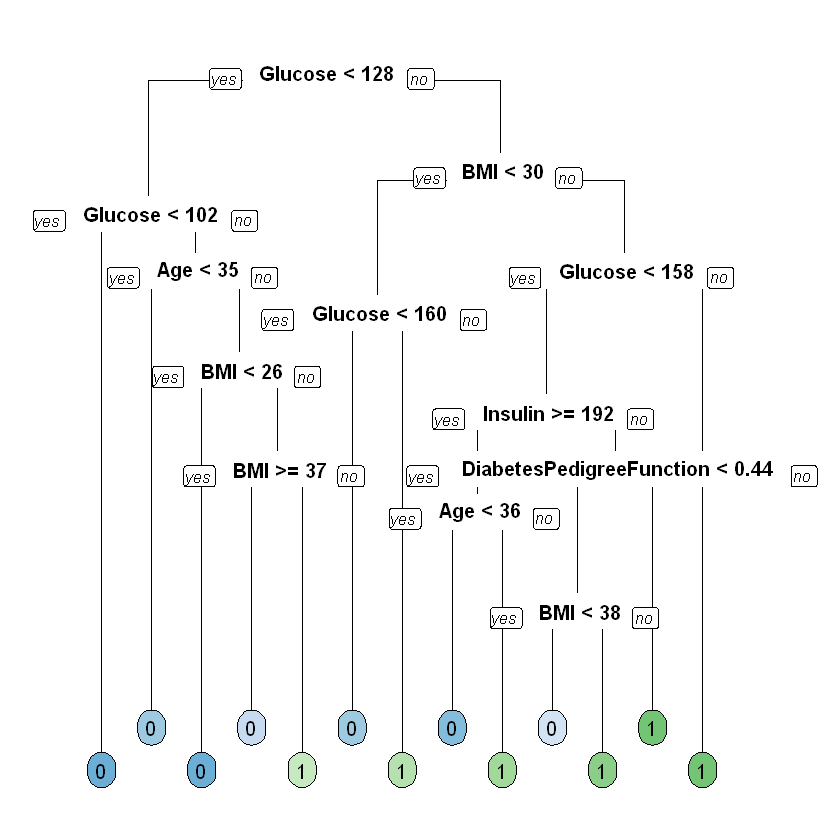

In [60]:
# type: 0; Draw a split label at each split and a node label at each leaf.
# yesno = 2; provides spli yes or no
# Extra = 0; no extra information

rpart.plot(x = Diabetes_model, yesno = 2, type = 0, extra = 0)

In [66]:
# class prediction
class_predicted <- predict(object = Diabetes_model,  
                            newdata = Diabetes_test,   
                            type = "class")


In [67]:
#treePred <- predict(model2, test, type = 'class')
table(class_predicted, Diabetes_test$Outcome)
mean(class_predicted==Diabetes_test$Outcome)

               
class_predicted  0  1
              0 76 31
              1 18 30

[1] 0.683871

In [68]:
# Model training based on gini-based splitting criteria
Diabetes_model1 <- rpart(formula = Outcome ~ ., 
                         data = Diabetes_train, 
                         method = "class",
                         parms = list(split = "gini"))
# Model training based on information gain-based splitting criteria
Diabetes_model2 <- rpart(formula = Outcome ~ ., 
                         data = Diabetes_train, 
                         method = "class",
                         parms = list(split = "information"))

In [69]:
# Generate class predictions on the test data using gini-based splitting criteria
pred1 <- predict(object = Diabetes_model1, 
                 newdata = Diabetes_test,
                 type = "class")
# Generate class predictions on test data using information gain based splitting criteria
pred2 <- predict(object = Diabetes_model2, 
                 newdata = Diabetes_test,
                 type = "class")

In [71]:
install.packages("forecast")
install.packages("zoo")
library("forecast")
library("zoo")

package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpYhWg3D\downloaded_packages
package 'zoo' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpYhWg3D\downloaded_packages


Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



In [72]:
accuracy(actual = Diabetes_test$Outcome, 
   predicted = pred1)

accuracy(actual = Diabetes_test$Outcome, 
   predicted = pred2)


ERROR: Error in is.element(class(object), c("ARFIMA", "mforecast", "forecast", : argument "object" is missing, with no default


In [3]:
install.packages("magrittr") # package installations are only needed the first time you use it
install.packages("dplyr")    # alternative installation of the %>%
library(magrittr) # needs to be run every time you start R and want to use %>%
library(dplyr)    # alternatively, this also loads %>%

package 'magrittr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpYhWg3D\downloaded_packages
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpYhWg3D\downloaded_packages


Warning message:
"package 'magrittr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [5]:
cat("Number of rows in the data = ", nrow(diabetes));
cat("\nMissing values for Blood Pressure = ", as.numeric(diabetes %>% filter(BloodPressure == 0) %>% count()));
cat("\nMissing values for Insulin = ", as.numeric(diabetes %>% filter(Insulin == 0) %>% count()));
cat("\nMissing values for SkinThickness = ", as.numeric(diabetes %>% filter(SkinThickness == 0) %>% count()));

Number of rows in the data =  768
Missing values for Blood Pressure =  35
Missing values for Insulin =  374
Missing values for SkinThickness =  227

In [6]:
# half of the data for insulin = 0's, that is a big problem because 
# the dataset only contains 768 observations. Skin thickness has 227
# values of 0, which must be missing data as well

In [7]:

df2 <- diabetes 
# I will use the mean of Blood Pressure,Glucose, & BMI for both datasets
df2$BloodPressure[df2$BloodPressure == 0] = mean(df2$BloodPressure);
df2$Glucose[df2$Glucose == 0] = mean(df2$Glucose);
df2$BMI[df2$BMI == 0] = mean(df2$BMI);
# I will remove Skin Thickness and insulin from the second dataset 
# to preserve the overall row count when I split into training & testing later
df2 <- df2 %>% select(everything(), - c(SkinThickness, Insulin))

In [11]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [16]:
library(cowplot)

Warning message:
"package 'cowplot' was built under R version 3.6.3"

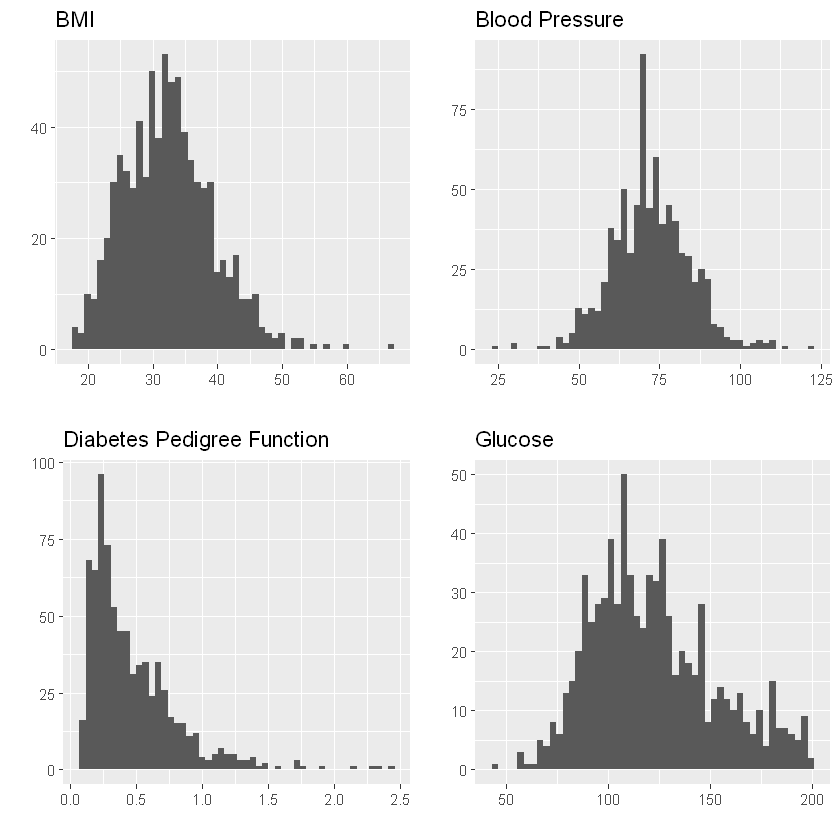

In [18]:
a = qplot(df2$BloodPressure, main = "Blood Pressure", xlab = "",bins = 50) # many 0's = missing data          
b = qplot(df2$BMI, main = "BMI", xlab = "", bins = 50) # many 0's = missing data
c = qplot(df2$Glucose, main = "Glucose", xlab = "", bins = 50) # some 0's = missing data
d = qplot(df2$DiabetesPedigreeFunction, main = "Diabetes Pedigree Function", xlab = "", bins = 50) # many 0's = missing data 
plot_grid(b,a,d,c, ncol = 2, nrow = 2)

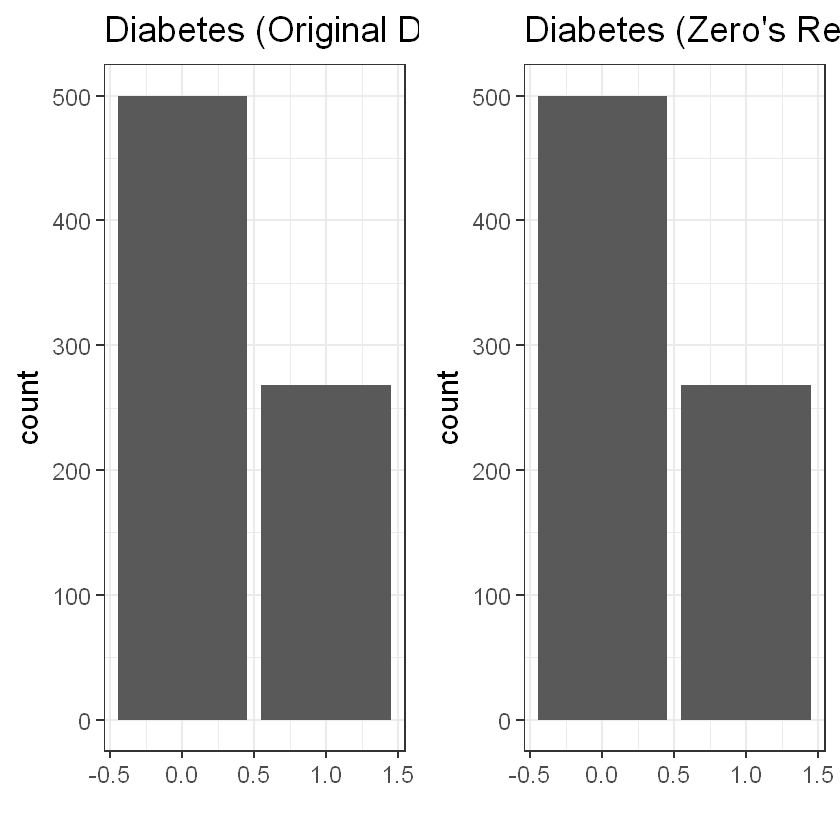

In [22]:
a = ggplot(data = diabetes, aes(Outcome, fill = Outcome, color = Outcome)) + 
  geom_bar(stat = "count", lwd = 2, show.legend = F) + 
  labs(x = "",title = "Diabetes (Original Dataset)") + 
  theme_bw(base_size = 18) +
  scale_fill_manual(values = c('gold', 'sienna')) +
  scale_color_manual(values = c('gold4', 'sienna4')) 
# uses stat_count to count and transfom the data into columns
b = ggplot(data = df2, aes(Outcome, fill = Outcome, color = Outcome)) + 
  geom_bar(stat = "count", lwd = 2, show.legend = F) + 
  labs(x = "",title = "Diabetes (Zero's Removed/Replaced)") + 
  theme_bw(base_size = 18) +
  scale_fill_manual(values = c('gold', 'sienna')) +
  scale_color_manual(values = c('gold4', 'sienna4')) 
#options(repr.plot.width=16, repr.plot.height=8)
plot_grid(a,b, ncol = 2, nrow = 1)

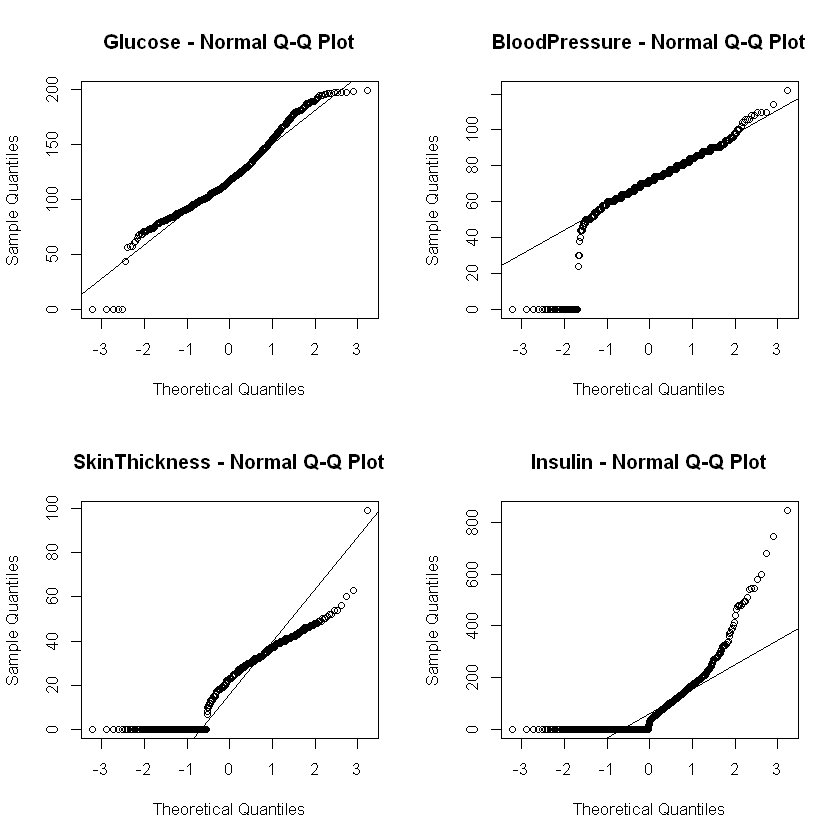

In [25]:
par(mfrow=c(2,2))
qqnorm(diabetes$Glucose, main = "Glucose - Normal Q-Q Plot");qqline(diabetes$Glucose)
qqnorm(diabetes$BloodPressure, main = "BloodPressure - Normal Q-Q Plot");qqline(diabetes$BloodPressure)
qqnorm(diabetes$SkinThickness, main = "SkinThickness - Normal Q-Q Plot");qqline(diabetes$SkinThickness)
qqnorm(diabetes$Insulin, main = "Insulin - Normal Q-Q Plot");qqline(diabetes$Insulin)

# QQ-Plots of the Distirbutions (0's removed) 

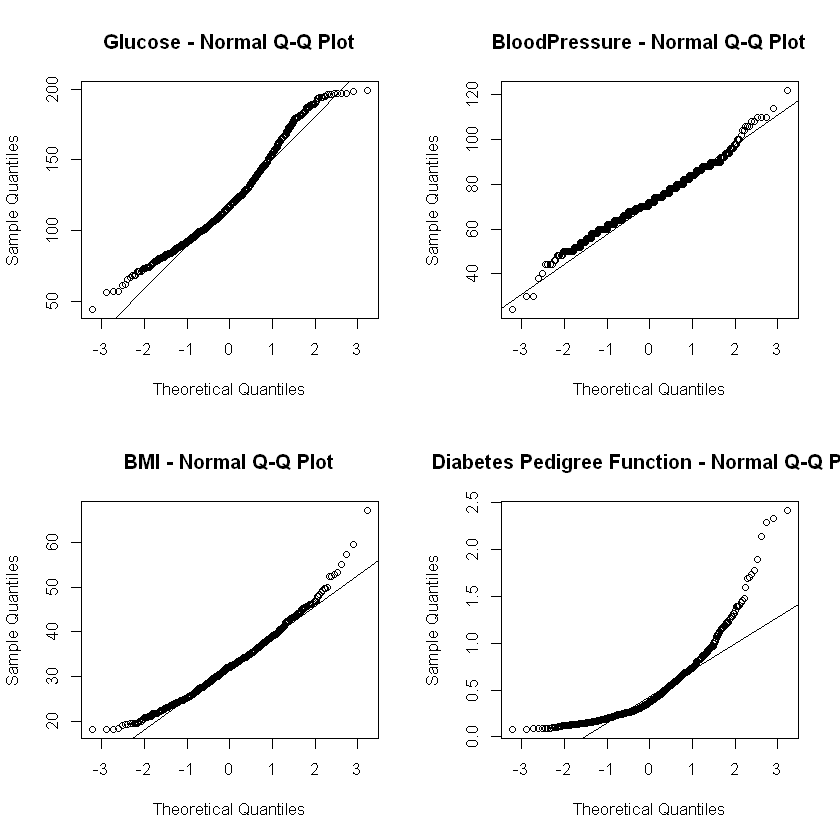

In [27]:
par(mfrow=c(2,2))
qqnorm(df2$Glucose, main = "Glucose - Normal Q-Q Plot");qqline(diabetes$Glucose)
qqnorm(df2$BloodPressure, main = "BloodPressure - Normal Q-Q Plot");qqline(diabetes$BloodPressure)
qqnorm(df2$BMI, main = "BMI - Normal Q-Q Plot");qqline(diabetes$BMI)
qqnorm(df2$DiabetesPedigreeFunction, main = "Diabetes Pedigree Function - Normal Q-Q Plot");qqline(diabetes$DiabetesPedigreeFunction)
par(mfrow=c(1,1))

In [34]:
# install.packages('caTools')
library(caTools)

####     Original Dataset   #####
set.seed(123)
split = sample.split(diabetes$Outcome, SplitRatio = 0.75)
training_set1 = subset(diabetes, split == TRUE)
test_set1 = subset(diabetes, split == FALSE)

####     Dataset zero's removed  #####
set.seed(123)
split = sample.split(df2$Outcome, SplitRatio = 0.75)
training_set2 = subset(df2, split == TRUE)
test_set2 = subset(df2, split == FALSE)

Warning message:
"package 'caTools' was built under R version 3.6.3"

In [35]:
#Feature Scaling 
training_set1[,-c(1,9)] = scale(training_set1[,-c(1,9)]);
test_set1[,-c(1,9)] = scale(test_set1[,-c(1,9)])
head(training_set1)

training_set2[,-c(1,7)] = scale(training_set2[,-c(1,7)]);
test_set2[,-c(1,7)] = scale(test_set2[,-c(1,7)])
head(training_set2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,0.8483773,0.1313201,0.9169082,-0.7084421,0.2234780,0.4796109,1.47041242,1
2,1,-1.1143843,-0.1951851,0.5400249,-0.7084421,-0.6704340,-0.3578224,-0.15934184,0
4,1,-0.9897646,-0.1951851,0.1631416,0.1464060,-0.4788814,-0.9161112,-1.01710724,0
5,0,0.5056729,-1.6100407,0.9169082,0.8193715,1.4366442,5.5193817,0.01221124,1
8,10,-0.1797359,-3.7867415,-1.2815777,-0.7084421,0.4405709,-1.0162391,-0.33089492,0
10,8,0.1318136,1.4373406,-1.2815777,-0.7084421,-4.0672994,-0.7188896,1.81351858,1


,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,0.8662968,-0.01875988,0.19043080,0.4796109,1.47041242,1
2,1,-1.2016794,-0.51625813,-0.83052181,-0.3578224,-0.15934184,0
4,1,-1.0703793,-0.51625813,-0.61174625,-0.9161112,-1.01710724,0
5,0,0.5052216,-2.67208391,1.57600934,5.5193817,0.01221124,1
8,10,-0.2169288,-0.25876392,0.43837643,-1.0162391,-0.33089492,0
10,8,0.1113214,1.97123315,-0.04401228,-0.7188896,1.81351858,1


In [37]:

# model 1 with zero's included
m1 <- training_set1 %>% select(Outcome, 
                    Glucose, 
                    BMI, 
                    Age, 
                    #Pregnancies,
                    DiabetesPedigreeFunction,
                    Insulin,
                    BloodPressure
                    #SkinThickness
                    ) %>% 
  glm(family = binomial(link = 'logit'))

summary(m1);
# Residual Deviance for a well-fitting model should be 
# approximately equal to its degrees of freedom
# variable importance
caret::varImp(m1)


Call:
glm(formula = ., family = binomial(link = "logit"))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6132  -0.6975  -0.4132   0.6959   2.9075  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -0.8562     0.1118  -7.659 1.88e-14 ***
Glucose                    1.2574     0.1443   8.715  < 2e-16 ***
BMI                        0.7191     0.1330   5.407 6.40e-08 ***
Age                        0.4057     0.1133   3.580 0.000343 ***
DiabetesPedigreeFunction   0.2578     0.1183   2.179 0.029366 *  
Insulin                   -0.2902     0.1157  -2.508 0.012143 *  
BloodPressure             -0.3212     0.1193  -2.693 0.007076 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 745.11  on 575  degrees of freedom
Residual deviance: 535.95  on 569  degrees of freedom
AIC: 549.95

Number of Fisher Scoring iterations: 

,Overall
Glucose,8.715182
BMI,5.407310
Age,3.580126
DiabetesPedigreeFunction,2.178542
Insulin,2.507975
BloodPressure,2.693246


In [38]:
# model 2 with zero's excluded
m2 <- training_set2 %>% select(Outcome, 
                    Glucose, 
                    BMI, 
                    Age
                    #Pregnancies,
                    #DiabetesPedigreeFunction
                    #BloodPressure
                    ) %>% 
  glm(family = binomial(link = 'logit'))

summary(m2);
# Residual Deviance for a well-fitting model should be 
# approximately equal to its degrees of freedom
# variable importance
caret::varImp(m2)


Call:
glm(formula = ., family = binomial(link = "logit"))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5254  -0.7097  -0.4042   0.7062   2.2904  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.8420     0.1105  -7.618 2.57e-14 ***
Glucose       1.1259     0.1247   9.027  < 2e-16 ***
BMI           0.6212     0.1168   5.316 1.06e-07 ***
Age           0.3722     0.1046   3.557 0.000375 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 745.11  on 575  degrees of freedom
Residual deviance: 542.13  on 572  degrees of freedom
AIC: 550.13

Number of Fisher Scoring iterations: 5


,Overall
Glucose,9.026624
BMI,5.316156
Age,3.557016


In [39]:
# model 1 with zero's included
m3 <-  glm(Outcome ~
             #Glucose + 
             BMI + 
             #A +
             Age * Glucose +
             #A * BMI + 
             #A * BloodPressure + 
             #Pregnancies +
             #DiabetesPedigreeFunction +
             #Insulin +
             BloodPressure, 
             #SkinThickness,
           data = training_set1,
           family = binomial(link = 'logit'))
summary(m3);


Call:
glm(formula = Outcome ~ BMI + Age * Glucose + BloodPressure, 
    family = binomial(link = "logit"), data = training_set1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3264  -0.7181  -0.4015   0.7114   2.7654  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -0.8459     0.1128  -7.499 6.45e-14 ***
BMI             0.6708     0.1296   5.178 2.25e-07 ***
Age             0.5162     0.1140   4.528 5.95e-06 ***
Glucose         1.1820     0.1335   8.853  < 2e-16 ***
BloodPressure  -0.3385     0.1171  -2.892  0.00383 ** 
Age:Glucose    -0.1863     0.1233  -1.511  0.13075    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 745.11  on 575  degrees of freedom
Residual deviance: 543.01  on 570  degrees of freedom
AIC: 555.01

Number of Fisher Scoring iterations: 5


In [40]:
m4 <- glm(Outcome ~
            #Glucose + 
            BMI + 
            #A,
            Age * Glucose,
            #A * BMI + 
            #A * BloodPressure + 
            #Pregnancies +
            #DiabetesPedigreeFunction +
            #BloodPressure,
          data = training_set2,
          family = binomial(link = 'logit'))
summary(m4);


Call:
glm(formula = Outcome ~ BMI + Age * Glucose, family = binomial(link = "logit"), 
    data = training_set2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3741  -0.7147  -0.3973   0.7079   2.3163  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.8284     0.1119  -7.404 1.33e-13 ***
BMI           0.6091     0.1176   5.178 2.24e-07 ***
Age           0.4034     0.1074   3.755 0.000173 ***
Glucose       1.1532     0.1283   8.988  < 2e-16 ***
Age:Glucose  -0.1353     0.1199  -1.129 0.259041    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 745.11  on 575  degrees of freedom
Residual deviance: 540.89  on 571  degrees of freedom
AIC: 550.89

Number of Fisher Scoring iterations: 5


In [42]:
install.packages('e1071', dependencies=TRUE)

install.packages('caret', dependencies=TRUE)

also installing the dependencies 'mlbench', 'slam'




  There is a binary version available but the source version is later:
     binary source needs_compilation
slam 0.1-47 0.1-48              TRUE

package 'mlbench' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpYhWg3D\downloaded_packages


installing the source package 'slam'

Warning message in install.packages("e1071", dependencies = TRUE):
"installation of package 'slam' had non-zero exit status"also installing the dependencies 'profileModel', 'generics', 'brglm', 'qvcalc', 'plotmo', 'strucchange', 'ISwR', 'ModelMetrics', 'recipes', 'BradleyTerry2', 'earth', 'fastICA', 'gam', 'mda', 'MLmetrics', 'party', 'pls', 'proxy', 'RANN', 'spls', 'subselect', 'pamr', 'superpc', 'Cubist'




  There is a binary version available but the source version is later:
    binary source needs_compilation
gam 1.16.1   1.20              TRUE

package 'profileModel' successfully unpacked and MD5 sums checked
package 'generics' successfully unpacked and MD5 sums checked
package 'brglm' successfully unpacked and MD5 sums checked
package 'qvcalc' successfully unpacked and MD5 sums checked
package 'plotmo' successfully unpacked and MD5 sums checked
package 'strucchange' successfully unpacked and MD5 sums checked
package 'ISwR' successfully unpacked and MD5 sums checked
package 'ModelMetrics' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'ModelMetrics'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying D:\anaconda\envs\R_env\Lib\R\library\00LOCK\ModelMetrics\libs\x64\ModelMetrics.dll to D:\anaconda\envs\R_env\Lib\R\library\ModelMetrics\libs\x64\ModelMetrics.dll: Permission denied"Warning message:
"restored 'ModelMetrics'"

package 'recipes' successfully unpacked and MD5 sums checked
package 'BradleyTerry2' successfully unpacked and MD5 sums checked
package 'earth' successfully unpacked and MD5 sums checked
package 'fastICA' successfully unpacked and MD5 sums checked
package 'mda' successfully unpacked and MD5 sums checked
package 'MLmetrics' successfully unpacked and MD5 sums checked
package 'party' successfully unpacked and MD5 sums checked
package 'pls' successfully unpacked and MD5 sums checked
package 'proxy' successfully unpacked and MD5 sums checked
package 'RANN' successfully unpacked and MD5 sums checked
package 'spls' successfully unpacked and MD5 sums checked
package 'subselect' successfully unpacked and MD5 sums checked
package 'pamr' successfully unpacked and MD5 sums checked
package 'superpc' successfully unpacked and MD5 sums checked
package 'Cubist' successfully unpacked and MD5 sums checked
package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying D:\anaconda\envs\R_env\Lib\R\library\00LOCK\caret\libs\x64\caret.dll to D:\anaconda\envs\R_env\Lib\R\library\caret\libs\x64\caret.dll: Permission denied"Warning message:
"restored 'caret'"


The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpYhWg3D\downloaded_packages


installing the source package 'gam'

Warning message in install.packages("caret", dependencies = TRUE):
"installation of package 'gam' had non-zero exit status"

In [45]:
library(caret)

Loading required package: lattice


In [46]:
# change predicted probabilities to 1 or 0
y_pred1 <- ifelse(predict(m1, type = "response", 
                      newdata = test_set1[-1]) > 0.5, 1,0)
# create confusion matrix table
t1 = table(predicted = y_pred1, actual = test_set1$Outcome);
cm1 = confusionMatrix(t1, positive = "1"); 

#--------------------------------------------#
y_pred2 <- ifelse(predict(m2, type = "response", 
                      newdata = test_set2[-1]) > 0.5, 1,0)
t2 = table(predicted = y_pred2, actual = test_set2$Outcome);
cm2 = confusionMatrix(t2, positive = "1"); 

#--------------------------------------------#
y_pred3 <- ifelse(predict(m3, type = "response", 
                      newdata = test_set1[-1]) > 0.5, 1,0)
t3 = table(predicted = y_pred3, actual = test_set1$Outcome); 
cm3 = confusionMatrix(t3, positive = "1"); 

#--------------------------------------------#
y_pred4 <- ifelse(predict(m4, type = "response", 
                      newdata = test_set2[-1]) > 0.5, 1,0)
t4 = table(predicted = y_pred4, actual = test_set2$Outcome); 
cm4 = confusionMatrix(t4, positive = "1"); 

cat("#------------------------------------------------#\n")
cat("####    accuracy, sensitivity , specificity   ####\n")
cat("#------------------------------------------------#\n")
cat("\nModel 1 accuracy = ", round(cm1$overall["Accuracy"],4), "Sensitivity =",  round(cm1$byClass["Sensitivity"],4), 
    "Specificity = ", round(cm1$byClass["Specificity"], 4));
cat("\nModel 2 accuracy = ", round(cm2$overall["Accuracy"],4), "Sensitivity =",  round(cm2$byClass["Sensitivity"],4), 
    "Specificity = ", round(cm2$byClass["Specificity"], 4));
cat("\nModel 3 accuracy = ", round(cm3$overall["Accuracy"],4), "Sensitivity =",  round(cm3$byClass["Sensitivity"],4), 
    "Specificity = ", round(cm3$byClass["Specificity"], 4));
cat("\nModel 4 accuracy = ", round(cm4$overall["Accuracy"],4), "Sensitivity =",  round(cm4$byClass["Sensitivity"],4), 
    "Specificity = ", round(cm4$byClass["Specificity"], 4));

#------------------------------------------------#
####    accuracy, sensitivity , specificity   ####
#------------------------------------------------#

Model 1 accuracy =  0.7552 Sensitivity = 0.5821 Specificity =  0.848
Model 2 accuracy =  0.7552 Sensitivity = 0.5672 Specificity =  0.856
Model 3 accuracy =  0.7344 Sensitivity = 0.5672 Specificity =  0.824
Model 4 accuracy =  0.75 Sensitivity = 0.5672 Specificity =  0.848

In [47]:
library(pROC)

Warning message:
"package 'pROC' was built under R version 3.6.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



In [51]:
library(ROCR)

Warning message:
"package 'ROCR' was built under R version 3.6.3"

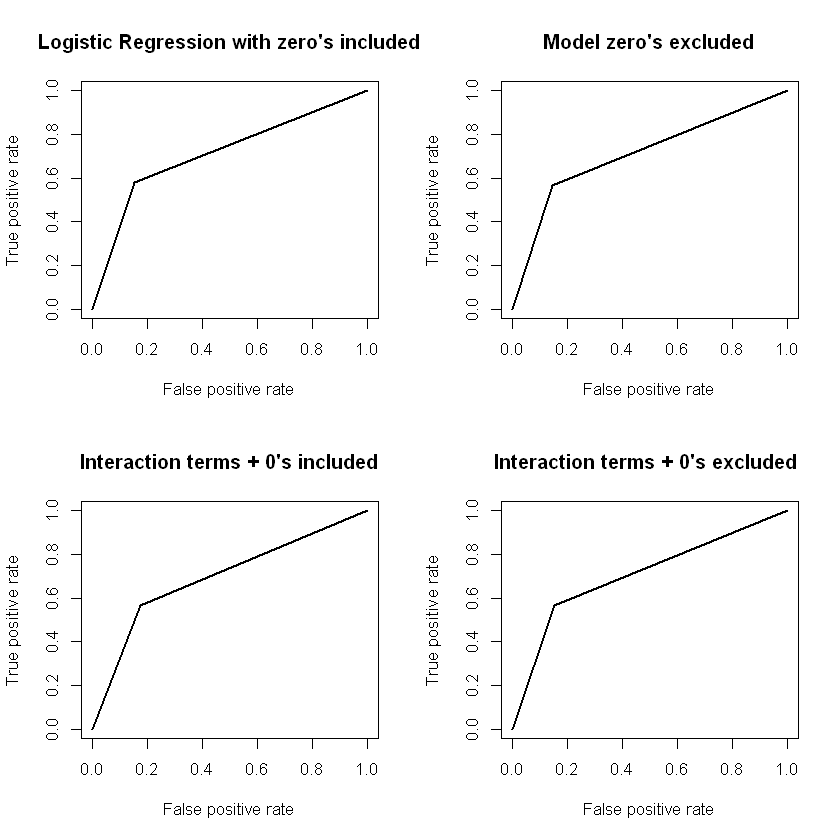

In [54]:
par(mfrow = c(2,2))
prediction(y_pred1, test_set1$Outcome) %>%
  performance(measure = "tpr", x.measure = "fpr") %>%
  plot(lwd = 2, main = "Logistic Regression with zero's included");
prediction(y_pred2, test_set2$Outcome) %>%
  performance(measure = "tpr", x.measure = "fpr") %>%
  plot(lwd = 2, main = "Model zero's excluded");
prediction(y_pred3, test_set1$Outcome) %>%
  performance(measure = "tpr", x.measure = "fpr") %>%
  plot(lwd = 2, main = "Interaction terms + 0's included");
prediction(y_pred4, test_set2$Outcome) %>%
  performance(measure = "tpr", x.measure = "fpr") %>%
  plot(lwd = 2, main = "Interaction terms + 0's excluded ")

In [2]:
diabetes$BloodPressure <- NULL
diabetes$SkinThickness <- NULL
train <- diabetes[1:540,]
test <- diabetes[541:768,]

In [3]:
model <-glm(Outcome ~.,family=binomial(link='logit'),data=train)
summary(model)


Call:
glm(formula = Outcome ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4366  -0.7741  -0.4312   0.8021   2.7310  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.3461752  0.8157916 -10.231  < 2e-16 ***
Pregnancies               0.1246856  0.0373214   3.341 0.000835 ***
Glucose                   0.0315778  0.0042497   7.431 1.08e-13 ***
Insulin                  -0.0013400  0.0009441  -1.419 0.155781    
BMI                       0.0881521  0.0164090   5.372 7.78e-08 ***
DiabetesPedigreeFunction  0.9642132  0.3430094   2.811 0.004938 ** 
Age                       0.0018904  0.0107225   0.176 0.860053    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 700.47  on 539  degrees of freedom
Residual deviance: 526.56  on 533  degrees of freedom
AIC: 

# The top three most relevant features are "Glucose", "BMI" and "Number of times pregnant" because of the low p-values.

"Insulin" and "Age" appear not statistically significant.

In [4]:
anova(model, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,539,700.4723,NA
Pregnancies,1,26.31439847,538,674.1579,2.901177e-07
Glucose,1,102.95966029,537,571.1983,3.420425e-24
Insulin,1,0.06201367,536,571.1362,8.033411e-01
BMI,1,36.13545562,535,535.0008,1.840672e-09
DiabetesPedigreeFunction,1,8.41424283,534,526.5865,3.722928e-03
Age,1,0.03101786,533,526.5555,8.602005e-01


# From the table of deviance, we can see that adding insulin and age have little effect on the residual deviance.

In [ ]:
Cross Validation

In [5]:
fitted.results <- predict(model,newdata=test,type='response')
fitted.results <- ifelse(fitted.results > 0.5,1,0)
misClasificError <- mean(fitted.results != test$Outcome)
print(paste('Accuracy',1-misClasificError))

[1] "Accuracy 0.789473684210526"


In [ ]:
Decision Tree

In [6]:
library(rpart)
model2 <- rpart(Outcome ~ Pregnancies + Glucose + BMI + DiabetesPedigreeFunction, data=train,method="class")

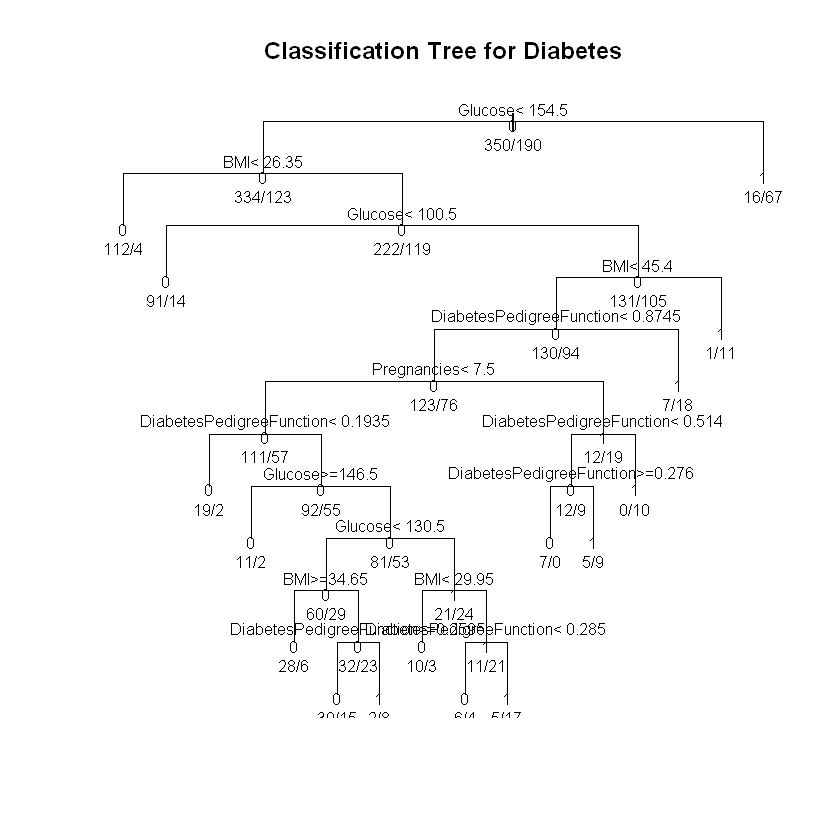

In [7]:
plot(model2, uniform=TRUE, 
  	main="Classification Tree for Diabetes")
text(model2, use.n=TRUE, all=TRUE, cex=.8)

# This means if a person's BMI less than 45.4 and her diabetes digree function less than 0.8745, then she is more likely to have diabetes

In [ ]:
Confusion table and accuracy


In [8]:
treePred <- predict(model2, test, type = 'class')
table(treePred, test$Outcome)
mean(treePred==test$Outcome)

        
treePred   0   1
       0 121  29
       1  29  49

[1] 0.745614

I compared the performance of Logistic Regression and Decision Tree algorithms and found that Logistic Regression performed better on this standard, unaltered dataset.

In [15]:
db <- read.csv("diabetes.csv", header=T, stringsAsFactors=F)

In [16]:
# Create Age Category column
db$Age_Cat <- ifelse(db$Age < 21, "<21", 
                   ifelse((db$Age>=21) & (db$Age<=25), "21-25", 
                   ifelse((db$Age>25) & (db$Age<=30), "25-30",
                   ifelse((db$Age>30) & (db$Age<=35), "30-35",
                   ifelse((db$Age>35) & (db$Age<=40), "35-40",
                   ifelse((db$Age>40) & (db$Age<=50), "40-50",
                   ifelse((db$Age>50) & (db$Age<=60), "50-60",">60")))))))

In [17]:
db$Age_Cat <- factor(db$Age_Cat, levels = c('<21','21-25','25-30','30-35','35-40','40-50','50-60','>60'))
table(db$Age_Cat)


  <21 21-25 25-30 30-35 35-40 40-50 50-60   >60 
    0   267   150    81    76   113    54    27 

In [18]:
db_cor <- round(cor(db[1:8]),1)
db_cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.0,0.1,0.1,-0.1,-0.1,0.0,0.0,0.5
Glucose,0.1,1.0,0.2,0.1,0.3,0.2,0.1,0.3
BloodPressure,0.1,0.2,1.0,0.2,0.1,0.3,0.0,0.2
SkinThickness,-0.1,0.1,0.2,1.0,0.4,0.4,0.2,-0.1
Insulin,-0.1,0.3,0.1,0.4,1.0,0.2,0.2,0.0
BMI,0.0,0.2,0.3,0.4,0.2,1.0,0.1,0.0
DiabetesPedigreeFunction,0.0,0.1,0.0,0.2,0.2,0.1,1.0,0.0
Age,0.5,0.3,0.2,-0.1,0.0,0.0,0.0,1.0


In [19]:
require(caTools)
set.seed(3)
sample = sample.split(db$Outcome, SplitRatio=0.75)
train = subset(db, sample==TRUE)
test = subset(db, sample==FALSE)

Loading required package: caTools
Warning message:
"package 'caTools' was built under R version 3.6.3"

In [20]:
# Baseline model
table(db$Outcome)



  0   1 
500 268 

In [21]:
baseline <- round(500/nrow(diabetes),2)
baseline

[1] 0.65

# Do not select a model whose accuracy is lower than the baseline model. In this case, it is 0.65

In [22]:

AllVar <- glm(Outcome ~ ., data = train, family = binomial)
summary(AllVar)


Call:
glm(formula = Outcome ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5680  -0.7074  -0.4311   0.7421   2.8979  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -6.140633   1.442614  -4.257 2.08e-05 ***
Pregnancies               0.043779   0.039640   1.104 0.269414    
Glucose                   0.034511   0.004255   8.111 5.00e-16 ***
BloodPressure            -0.015237   0.006253  -2.437 0.014818 *  
SkinThickness             0.004535   0.007823   0.580 0.562170    
Insulin                  -0.001881   0.001034  -1.819 0.068962 .  
BMI                       0.066069   0.017458   3.785 0.000154 ***
DiabetesPedigreeFunction  1.042778   0.353860   2.947 0.003210 ** 
Age                      -0.048658   0.052789  -0.922 0.356659    
Age_Cat25-30              0.557992   0.418509   1.333 0.182439    
Age_Cat30-35              1.370840   0.626633   2.188 0.028697 *  


In [23]:
PredictTrain <- predict(AllVar, type = "response")
summary(PredictTrain)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0024  0.1162  0.2667  0.3490  0.5489  0.9876 

In [24]:

threshold_0.5 <- table(train$Outcome, PredictTrain > 0.5)
threshold_0.5

# Accuracy
accuracy_0.5 <- round(sum(diag(threshold_0.5))/sum(threshold_0.5),2)
sprintf("Accuracy is %s",accuracy_0.5)

# Mis-classification error rate
MC_0.5 <- 1-accuracy_0.5
sprintf("Mis-classification error is %s",MC_0.5)

sensitivity0.5 <- round(118/(83+118),2)
specificity0.5 <- round(333/(333+42),2)
sprintf("Sensitivity at 0.5 threshold: %s", sensitivity0.5)
sprintf("Specificity at 0.5 threshold: %s", specificity0.5)

   
    FALSE TRUE
  0   333   42
  1    83  118

[1] "Accuracy is 0.78"

[1] "Mis-classification error is 0.22"

[1] "Sensitivity at 0.5 threshold: 0.59"

[1] "Specificity at 0.5 threshold: 0.89"

In [25]:
# Build confusion matrix with a threshold value of 0.7

threshold_0.7 <- table(train$Outcome, PredictTrain > 0.7)
threshold_0.7

# Accuracy
accuracy_0.7 <- round(sum(diag(threshold_0.7))/sum(threshold_0.7),2)
sprintf('Accuracy is %s', accuracy_0.7)

# Mis-classification error rate
MC_0.7 <- 1-accuracy_0.7
sprintf("Mis-classification error is %s",MC_0.7)

sensitivity0.7 <- round(78/(123+78),2)
specificity0.7 <- round(359/(359+16),2)
sprintf("Sensitivity at 0.7 threshold: %s", sensitivity0.7)
sprintf("Specificity at 0.7 threshold: %s", specificity0.7)

   
    FALSE TRUE
  0   359   16
  1   123   78

[1] "Accuracy is 0.76"

[1] "Mis-classification error is 0.24"

[1] "Sensitivity at 0.7 threshold: 0.39"

[1] "Specificity at 0.7 threshold: 0.96"

In [26]:

threshold_0.2 <- table(train$Outcome, PredictTrain > 0.2)
threshold_0.2

# Accuracy
accuracy_0.2 <- round(sum(diag(threshold_0.2))/sum(threshold_0.2),2)
sprintf("Accuracy is %s", accuracy_0.2)

# Mis-classification error rate
MC_0.2 <- 1-accuracy_0.2
sprintf("Mis-classification error is %s",MC_0.2)

sensitivity0.2 <- round(180/(21+180),2)
specificity0.2 <- round(215/(215+160),2)
sprintf("Sensitivity at 0.2 threshold: %s",sensitivity0.2)
sprintf("Specificity at 0.2 threshold: %s",specificity0.2)

   
    FALSE TRUE
  0   215  160
  1    21  180

[1] "Accuracy is 0.69"

[1] "Mis-classification error is 0.31"

[1] "Sensitivity at 0.2 threshold: 0.9"

[1] "Specificity at 0.2 threshold: 0.57"

Warning message:
"package 'ROCR' was built under R version 3.6.3"

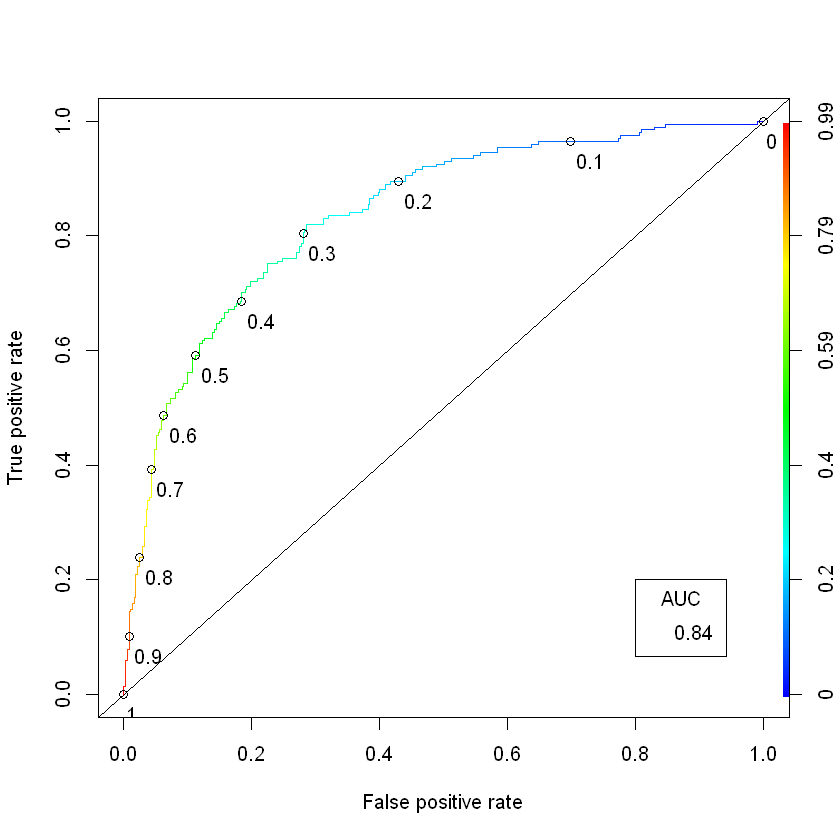

In [27]:
library(ROCR)

ROCRpred = prediction(PredictTrain, train$Outcome)
ROCRperf = performance(ROCRpred, "tpr", "fpr")

# Adding threshold labels
plot(ROCRperf, colorize=TRUE, print.cutoffs.at = seq(0,1,0.1), text.adj = c(-0.2, 1.7))
abline(a=0, b=1)

auc_train <- round(as.numeric(performance(ROCRpred, "auc")@y.values),2)
legend(.8, .2, auc_train, title = "AUC", cex=1)

In [ ]:
AUC (Area under the ROC curve): Absolute value of quality of prediction

AUC = Maximum of 1 (Perfect prediction)
AUC = minimum of 0.5 (just guessing)

In [28]:

PredictTest <- predict(AllVar, type = "response", newdata = test)

# Convert probabilities to values using the below

## Based on ROC curve above, selected a threshold of 0.5
test_tab <- table(test$Outcome, PredictTest > 0.5)
test_tab

accuracy_test <- round(sum(diag(test_tab))/sum(test_tab),2)
sprintf("Accuracy on test set is %s", accuracy_test)

   
    FALSE TRUE
  0   115   10
  1    25   42

[1] "Accuracy on test set is 0.82"

In [29]:
# Compute test AUC
ROCRPrediction = prediction(PredictTest, test$Outcome)
test_auc = round(as.numeric(performance(ROCRPrediction, "auc").values),2)
test_auc

[1] 0.89

In [2]:
library(tidyverse) 
library(ggplot2)
library(caret)
library(caretEnsemble)
library(psych)
library(Amelia)
library(mice)
library(GGally)
library(rpart)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift

Warning message:
"package 'caretEnsemble' was built under R version 3.6.3"
Attaching pa

ERROR: Error in library(Amelia): there is no package called 'Amelia'


In [38]:
str(diabetes)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [ ]:
# Normalize training data
scale_training <- as.data.frame(scale(dataset[train, -9],  
                                      center = TRUE, scale = TRUE))

scale_training$class <- dataset[train, "class"]

str(scale_training)

In [4]:
library(caret)
install.packages("tree")
library(tree)

package 'tree' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpEHzkWX\downloaded_packages


Warning message:
"package 'tree' was built under R version 3.6.3"Registered S3 method overwritten by 'tree':
  method     from
  print.tree cli 


In [5]:
library(e1071)

Warning message:
"package 'e1071' was built under R version 3.6.3"

In [43]:
train <- createDataPartition(y = diabetes$Outcome,p = 0.7,list = FALSE)
training <- diabetes[train,]
testing <- diabetes[-train,]


In [44]:
tuned <- tune.svm(Outcome ~., data = training, gamma = 10^(-6:-1), cost = 10^(-1:1))
summary(tuned) # to show the results


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
   0.1    1

- best performance: 0.1760225 

- Detailed performance results:
   gamma cost     error dispersion
1  1e-06  0.1 0.3265550 0.02694518
2  1e-05  0.1 0.3264378 0.02693579
3  1e-04  0.1 0.3254199 0.02689233
4  1e-03  0.1 0.3153697 0.02637070
5  1e-02  0.1 0.2481870 0.02335608
6  1e-01  0.1 0.1851195 0.03083987
7  1e-06  1.0 0.3264339 0.02694142
8  1e-05  1.0 0.3254232 0.02687309
9  1e-04  1.0 0.3152439 0.02639821
10 1e-03  1.0 0.2464894 0.02351936
11 1e-02  1.0 0.1789195 0.03033723
12 1e-01  1.0 0.1760225 0.03375992
13 1e-06 10.0 0.3254258 0.02689264
14 1e-05 10.0 0.3152184 0.02637429
15 1e-04 10.0 0.2462666 0.02355354
16 1e-03 10.0 0.1805354 0.03260775
17 1e-02 10.0 0.1876774 0.03235365
18 1e-01 10.0 0.1942155 0.04259914


In [45]:
svm_model  <- svm(Outcome ~., data = training, kernel = "radial", gamma = 0.01, cost = 10) 
summary(svm_model)


Call:
svm(formula = Outcome ~ ., data = training, kernel = "radial", gamma = 0.01, 
    cost = 10)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  10 
      gamma:  0.01 
    epsilon:  0.1 


Number of Support Vectors:  413






In [48]:
install.packages("heuristica")
library(heuristica)


package 'heuristica' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpEHzkWX\downloaded_packages


Warning message:
"package 'heuristica' was built under R version 3.6.3"

In [50]:
# Training The Model
treemethod <- tree(Outcome ~ ., data = training)

summary(treemethod)


Regression tree:
tree(formula = Outcome ~ ., data = training)
Variables actually used in tree construction:
[1] "Glucose"                  "Age"                     
[3] "Insulin"                  "BMI"                     
[5] "DiabetesPedigreeFunction" "Pregnancies"             
[7] "BloodPressure"           
Number of terminal nodes:  13 
Residual mean deviance:  0.1284 = 67.42 / 525 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.86760 -0.08718 -0.08718  0.00000  0.13240  0.96300 

In [51]:
treemethod 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 538 123.8000 0.35870  
   2) Glucose < 127.5 336  53.0400 0.19640  
     4) Age < 28.5 195  15.5200 0.08718 *
     5) Age > 28.5 141  31.9700 0.34750  
      10) Insulin < 140 124  25.1200 0.28230  
        20) BMI < 26.35 27   0.9630 0.03704 *
        21) BMI > 26.35 97  22.0800 0.35050  
          42) Glucose < 100 38   5.0530 0.15790 *
          43) Glucose > 100 59  14.7100 0.47460  
            86) DiabetesPedigreeFunction < 0.2525 17   2.4710 0.17650 *
            87) DiabetesPedigreeFunction > 0.2525 42  10.1200 0.59520 *
      11) Insulin > 140 17   2.4710 0.82350 *
   3) Glucose > 127.5 202  47.1500 0.62870  
     6) BMI < 29.95 48  10.6700 0.33330  
      12) Pregnancies < 1.5 14   0.9286 0.07143 *
      13) Pregnancies > 1.5 34   8.3820 0.44120  
        26) BloodPressure < 73 13   2.7690 0.69230 *
        27) BloodPressure > 73 21   4.2860 0.28570 *
     7) BMI > 29.95 154  30.9900 0.72080  
      14) G

The results display the split criterion (e.g. Glucose < 154.5), the number of observations in that branch, the deviance, the overall prediction for the branch (Yes/1 or No/0), and the fraction of observations in that branch that take on values of Yes and No. Branches that lead to terminal nodes are indicated using asterisks.

Now we plot of the tree, and interpret the results.

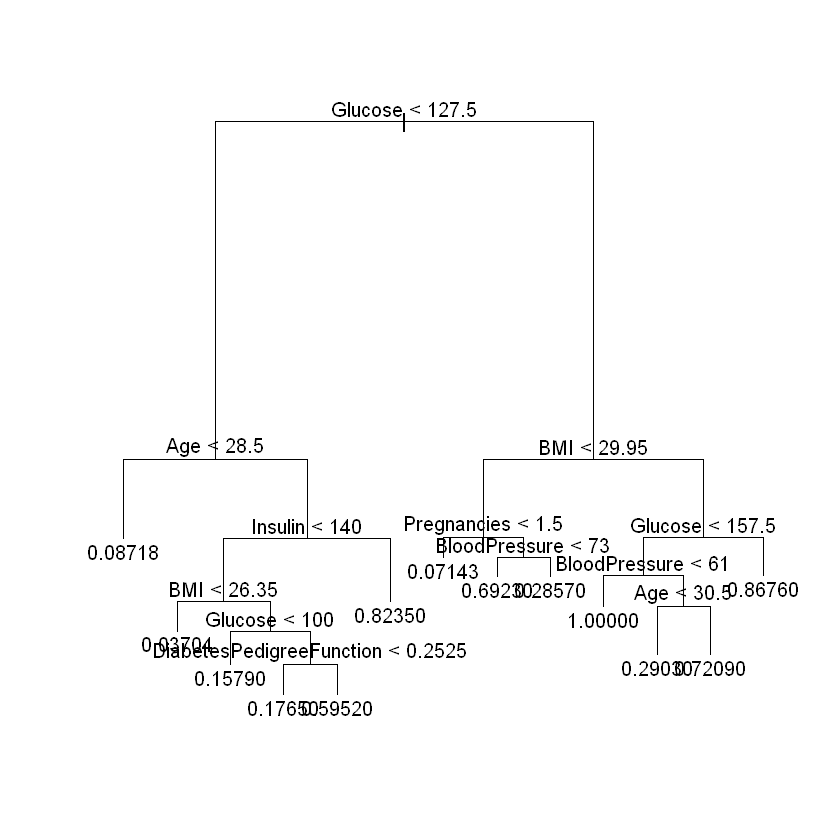

In [52]:
plot(treemethod)
text(treemethod, pretty = 0)

“Diabetes” appears to be Glucose, since the first branch split criterion (e.g. Glucose < 154.5).

Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

In [21]:
library(corrplot)
library(caret)

In [23]:
str(testing)

'data.frame':	192 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 8 5 7 1 ...
 $ Glucose                 : int  148 85 183 89 137 116 125 166 100 103 ...
 $ BloodPressure           : int  72 66 64 66 40 74 96 72 0 30 ...
 $ SkinThickness           : int  35 29 0 23 35 0 0 19 0 38 ...
 $ Insulin                 : int  0 0 0 94 168 0 0 175 0 83 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 0 25.8 30 43.3 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 54 51 32 33 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 1 1 0 ...


In [54]:
library(caret) #ML Model buidling package
library(tidyverse) #ggplot and dplyr
library(MASS) #Modern Applied Statistics with S
library(mlbench) #data sets from the UCI repository.
#library(summarytools)
library(corrplot) #Correlation plot
library(gridExtra) #Multiple plot in single grip space
library(timeDate) 
library(pROC) #ROC
library(caTools) #AUC
library(rpart.plot) #CART Decision Tree
library(e1071) #imports graphics, grDevices, class, stats, methods, utils
library(graphics) #fourfoldplot


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



ERROR: Error in library(mlbench): there is no package called 'mlbench'


In [56]:
diabetes$Outcome <- ifelse(diabetes$Outcome == 0, "neg", "pos")
diabetes$Outcome <- as.factor(diabetes$Outcome)
str(diabetes)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 1 2 2 ...


In [58]:
#store rows for partition
partition <- caret::createDataPartition(y = diabetes$Outcome, times = 1, p = 0.7, list = FALSE)

# create training data set
train_set <- diabetes[partition,]

# create testing data set, subtracting the rows partition to get remaining 30% of the data
test_set <- diabetes[-partition,]

str(train_set)

'data.frame':	538 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 8 10 1 5 7 0 7 ...
 $ Glucose                 : int  148 85 183 125 168 189 166 100 118 107 ...
 $ BloodPressure           : int  72 66 64 96 74 60 72 0 84 74 ...
 $ SkinThickness           : int  35 29 0 0 0 23 19 0 47 0 ...
 $ Insulin                 : int  0 0 0 0 0 846 175 0 230 0 ...
 $ BMI                     : num  33.6 26.6 23.3 0 38 30.1 25.8 30 45.8 29.6 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.232 0.537 0.398 0.587 0.484 0.551 0.254 ...
 $ Age                     : int  50 31 32 54 34 59 51 32 31 31 ...
 $ Outcome                 : Factor w/ 2 levels "neg","pos": 2 1 2 2 2 2 2 2 2 2 ...


In [59]:
model_forest <- caret::train(Outcome ~., data = train_set,
                         method = "ranger",
                         metric = "ROC",
                         trControl = trainControl(method = "cv", number = 10,
                                                  classProbs = T, summaryFunction = twoClassSummary),
                          preProcess = c("center","scale","pca"))
model_forest

Random Forest 

538 samples
  8 predictor
  2 classes: 'neg', 'pos' 

Pre-processing: centered (8), scaled (8), principal component signal
 extraction (8) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 484, 484, 485, 484, 484, 484, ... 
Resampling results across tuning parameters:

  mtry  splitrule   ROC        Sens       Spec     
  2     gini        0.7960526  0.8428571  0.5213450
  2     extratrees  0.7884628  0.8685714  0.4678363
  4     gini        0.7929365  0.8428571  0.5312865
  4     extratrees  0.7915497  0.8628571  0.4888889
  7     gini        0.7911153  0.8371429  0.5368421
  7     extratrees  0.7921387  0.8485714  0.5207602

Tuning parameter 'min.node.size' was held constant at a value of 1
ROC was used to select the optimal model using the largest value.
The final values used for the model were mtry = 2, splitrule = gini
 and min.node.size = 1.

In [60]:
# final ROC Value
model_forest$results[6,4]

[1] 0.7921387

In [63]:
install.packages("xgboost")
library(xgboost)
library(readr)
library(stringr)
library(caret)
library(car)

package 'xgboost' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpEHzkWX\downloaded_packages


Warning message:
"package 'xgboost' was built under R version 3.6.3"
Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice

Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"
Attaching package: 'car'

The following object is masked from 'package:psych':

    logit

The following object is masked from 'package:dplyr':

    recode

The following object is masked from 'package:purrr':

    some



In [64]:
# XGBOOST - eXtreme Gradient BOOSTing 
###############################################################
xgb_grid_1  <-  expand.grid(
                  nrounds = 50,
                  eta = c(0.03),
                  max_depth = 1,
                  gamma = 0,
                  colsample_bytree = 0.6,
                  min_child_weight = 1,
                  subsample = 0.5
                )

model_xgb <- caret::train(Outcome ~., data = train_set,
                         method = "xgbTree",
                         metric = "ROC",
                         tuneGrid=xgb_grid_1,
                         trControl = trainControl(method = "cv", number = 10,
                                                  classProbs = T, summaryFunction = twoClassSummary),
                         preProcess = c("center","scale","pca"))
model_xgb

eXtreme Gradient Boosting 

538 samples
  8 predictor
  2 classes: 'neg', 'pos' 

Pre-processing: centered (8), scaled (8), principal component signal
 extraction (8) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 484, 485, 484, 484, 484, 484, ... 
Resampling results:

  ROC        Sens       Spec    
  0.7905764  0.9542857  0.271345

Tuning parameter 'nrounds' was held constant at a value of 50
Tuning
 held constant at a value of 1
Tuning parameter 'subsample' was held
 constant at a value of 0.5

In [65]:
# final ROC value
model_xgb$results["ROC"]

ROC
0.7905764


In [66]:
#KNN - K Nearest Neighbours
#################################################################
model_knn <- caret::train(Outcome ~., data = train_set,
                         method = "knn",
                         metric = "ROC",
                         tuneGrid = expand.grid(.k = c(3:10)),
                         trControl = trainControl(method = "cv", number = 10,
                                                  classProbs = T, summaryFunction = twoClassSummary),
                          preProcess = c("center","scale","pca"))

model_knn

k-Nearest Neighbors 

538 samples
  8 predictor
  2 classes: 'neg', 'pos' 

Pre-processing: centered (8), scaled (8), principal component signal
 extraction (8) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 484, 484, 484, 484, 485, 484, ... 
Resampling results across tuning parameters:

  k   ROC        Sens       Spec     
   3  0.6953216  0.8057143  0.4745614
   4  0.7106391  0.8171429  0.4748538
   5  0.7237719  0.8314286  0.4532164
   6  0.7331997  0.8228571  0.4634503
   7  0.7527109  0.8400000  0.4798246
   8  0.7593358  0.8600000  0.4792398
   9  0.7532916  0.8542857  0.4684211
  10  0.7621721  0.8685714  0.4733918

ROC was used to select the optimal model using the largest value.
The final value used for the model was k = 10.

In [67]:
#final ROC value
model_knn$results[8,2]

[1] 0.7621721

In [68]:
# Logistic Regression
#######################################################################
model_glm <- caret::train(Outcome ~., data = train_set,
                         method = "glm",
                         metric = "ROC",
                         tuneLength = 10,
                         trControl = trainControl(method = "cv", number = 10,
                                                   classProbs = T, summaryFunction = twoClassSummary),
                          preProcess = c("center","scale","pca"))

model_glm

Generalized Linear Model 

538 samples
  8 predictor
  2 classes: 'neg', 'pos' 

Pre-processing: centered (8), scaled (8), principal component signal
 extraction (8) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 485, 484, 485, 484, 484, 484, ... 
Resampling results:

  ROC        Sens       Spec     
  0.8208521  0.8714286  0.5523392


In [69]:
#final ROC Value
model_glm$results[2]

ROC
0.8208521


In [70]:
# Rpart CART - classification and Regression Trees
#####################################################################################################################################
model_rpart <- caret::train(Outcome ~., data = train_set,
                         method = "rpart",
                         metric = "ROC",
                         tuneLength = 20,
                         trControl = trainControl(method = "cv", number = 10,
                                                   classProbs = T, summaryFunction = twoClassSummary))
                          # preProcess = c("center","scale","pca"))

model_rpart

CART 

538 samples
  8 predictor
  2 classes: 'neg', 'pos' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 484, 484, 484, 484, 484, 484, ... 
Resampling results across tuning parameters:

  cp          ROC        Sens       Spec     
  0.00000000  0.7650877  0.8057143  0.5801170
  0.01259798  0.7690226  0.8342857  0.5415205
  0.02519597  0.7166249  0.8400000  0.5157895
  0.03779395  0.6795363  0.8485714  0.4628655
  0.05039194  0.6608145  0.8400000  0.4523392
  0.06298992  0.6603634  0.8400000  0.4576023
  0.07558791  0.6603634  0.8400000  0.4576023
  0.08818589  0.6603634  0.8400000  0.4576023
  0.10078387  0.6604386  0.8200000  0.5008772
  0.11338186  0.6604386  0.8200000  0.5008772
  0.12597984  0.6604386  0.8200000  0.5008772
  0.13857783  0.6604386  0.8200000  0.5008772
  0.15117581  0.6604386  0.8200000  0.5008772
  0.16377380  0.6604386  0.8200000  0.5008772
  0.17637178  0.6604386  0.8200000  0.5008772
  0.18896976  0.6604386  0.8200000  0.50

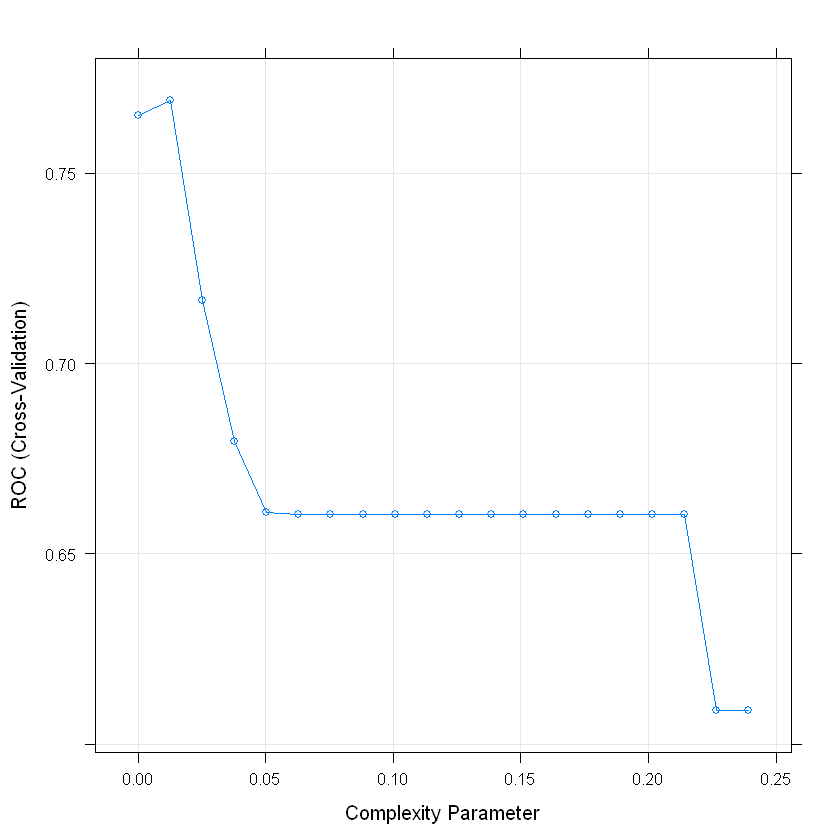

In [71]:
# Plot model accuracy vs different values of cp (complexity parameter)
plot(model_rpart)

In [72]:
# Structure of final model selected
model_rpart$finalModel

n= 538 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 538 188 neg (0.65055762 0.34944238)  
    2) Glucose< 127.5 341  67 neg (0.80351906 0.19648094)  
      4) Age< 29.5 201  19 neg (0.90547264 0.09452736) *
      5) Age>=29.5 140  48 neg (0.65714286 0.34285714)  
       10) BMI< 26.95 31   1 neg (0.96774194 0.03225806) *
       11) BMI>=26.95 109  47 neg (0.56880734 0.43119266)  
         22) Glucose< 106.5 59  18 neg (0.69491525 0.30508475)  
           44) DiabetesPedigreeFunction< 0.6355 44   9 neg (0.79545455 0.20454545) *
           45) DiabetesPedigreeFunction>=0.6355 15   6 pos (0.40000000 0.60000000) *
         23) Glucose>=106.5 50  21 pos (0.42000000 0.58000000)  
           46) Insulin< 142.5 39  19 pos (0.48717949 0.51282051)  
             92) Insulin>=11 7   1 neg (0.85714286 0.14285714) *
             93) Insulin< 11 32  13 pos (0.40625000 0.59375000)  
              186) Age< 34.5 11   4 neg (0.63636364 0.36363636) *
              187)

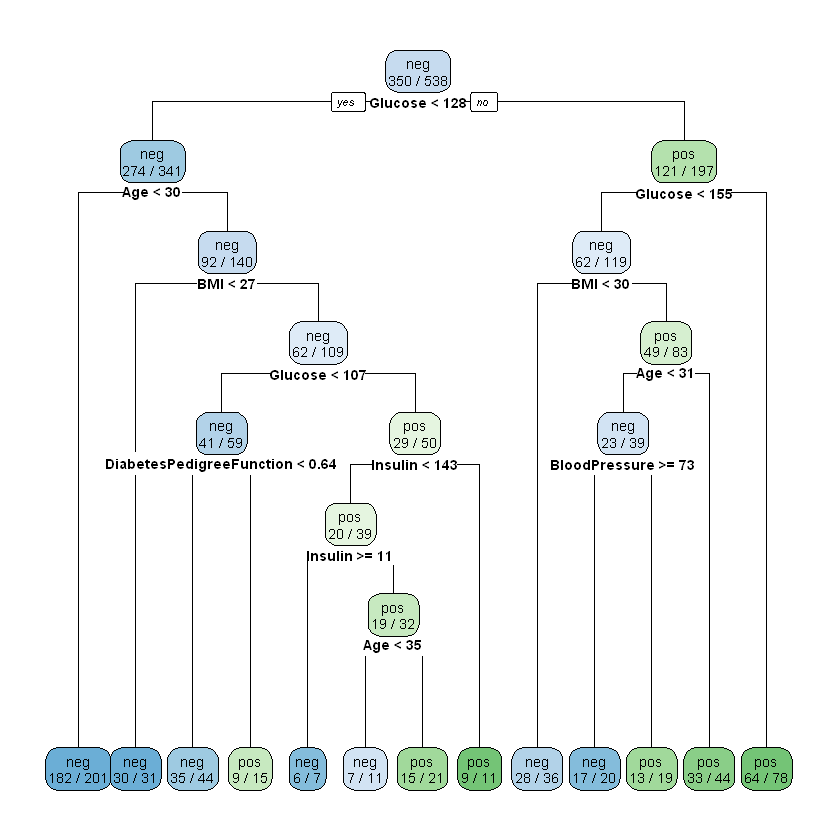

In [73]:
rpart.plot::rpart.plot(model_rpart$finalModel, type = 2, fallen.leaves = T, extra = 2, cex = 0.70)

# Training Data set - Model Comparision by ROC value

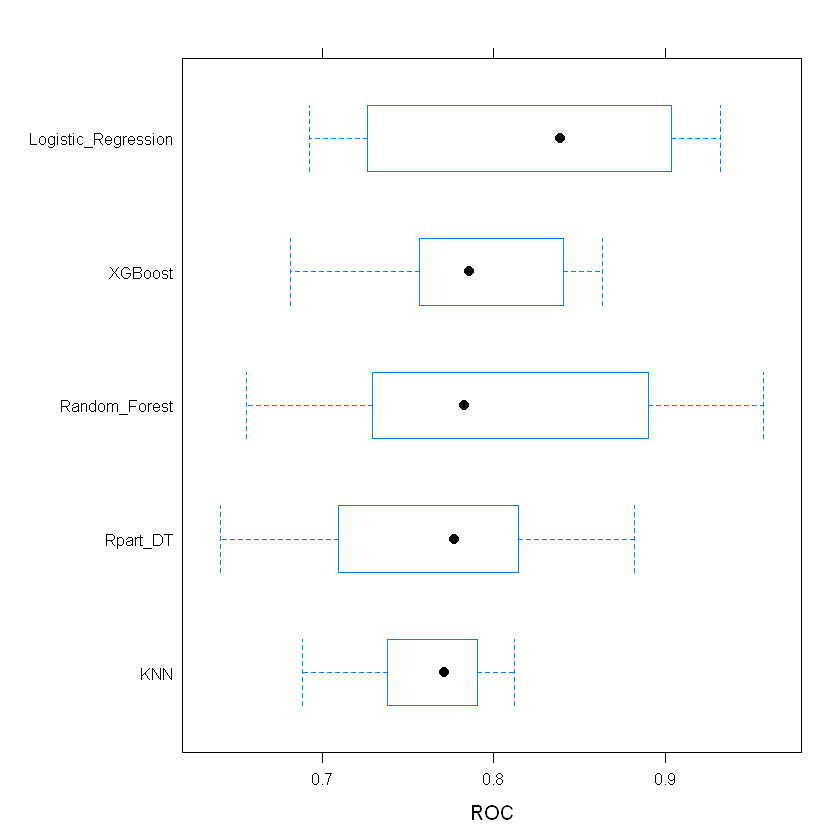

In [74]:
model_list <- list(Random_Forest = model_forest, XGBoost = model_xgb, KNN = model_knn, Logistic_Regression = model_glm, Rpart_DT = model_rpart)
resamples <- resamples(model_list)

#box plot
bwplot(resamples, metric="ROC")

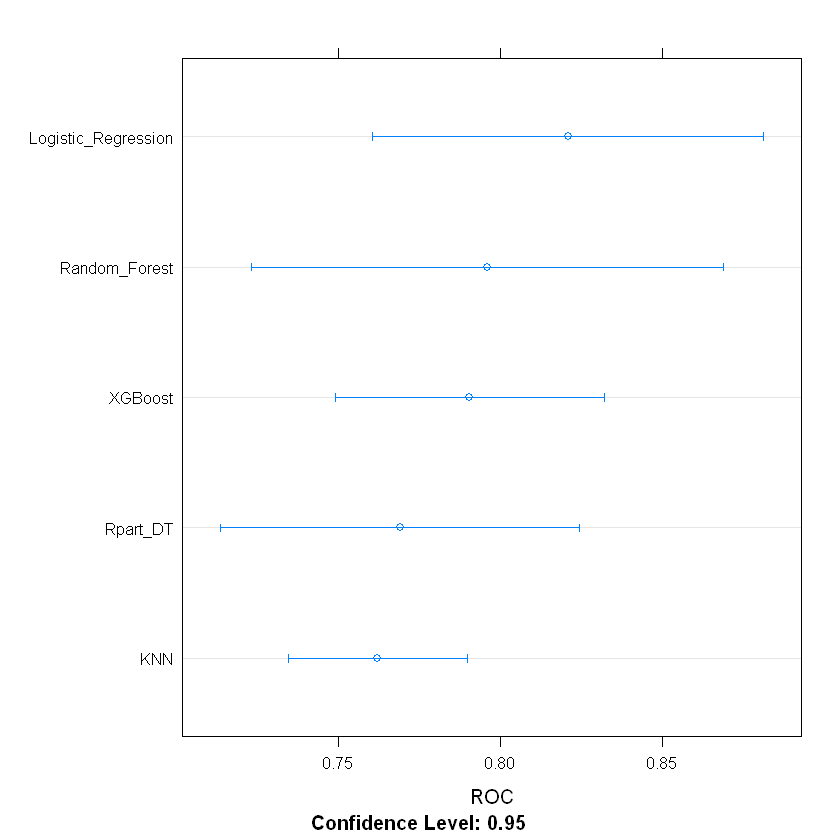

In [75]:
#dot plot
dotplot(resamples, metric="ROC")

In [27]:
library(rpart)
 
predicted= predict(treemethod,testing)
summary(predicted)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02985 0.13158 0.20000 0.34796 0.58974 0.94737 

In [8]:
#Check dimensions of the split
prop.table(table(diabetes$Outcome)) * 100
prop.table(table(training$Outcome)) * 100
prop.table(table(testing$Outcome)) * 100


       0        1 
65.10417 34.89583 


       0        1 
65.10417 34.89583 


       0        1 
65.10417 34.89583 

In [10]:
install.packages("klaR")
library(klaR)

also installing the dependencies 'R.methodsS3', 'R.oo', 'R.utils', 'R.cache', 'styler', 'classInt', 'labelled', 'combinat', 'questionr'



package 'R.methodsS3' successfully unpacked and MD5 sums checked
package 'R.oo' successfully unpacked and MD5 sums checked
package 'R.utils' successfully unpacked and MD5 sums checked
package 'R.cache' successfully unpacked and MD5 sums checked
package 'styler' successfully unpacked and MD5 sums checked
package 'classInt' successfully unpacked and MD5 sums checked
package 'labelled' successfully unpacked and MD5 sums checked
package 'combinat' successfully unpacked and MD5 sums checked
package 'questionr' successfully unpacked and MD5 sums checked
package 'klaR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpcbFMA6\downloaded_packages


Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



In [12]:
install.packages("caretEnsemble")
library(caretEnsemble)


also installing the dependency 'pbapply'



package 'pbapply' successfully unpacked and MD5 sums checked
package 'caretEnsemble' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpcbFMA6\downloaded_packages



Attaching package: 'caretEnsemble'

The following object is masked from 'package:ggplot2':

    autoplot



In [13]:
#This part is to surpress the warning messages to make the analysis aesthetically pleasing
options(warn = -1)

#create objects x which holds the predictor variables and y which holds the responce variables
x = training[,-9]
y = training$Outcome

library(e1071)
model = train(x,y,'nb',trControl=trainControl(method='cv',number=10))
model

ERROR: Error: wrong model type for regression


In [70]:
library(caret) #ML Model buidling package
library(tidyverse) #ggplot and dplyr
library(MASS) #Modern Applied Statistics with S
library(mlbench) #data sets from the UCI repository.
#library(summarytools)
library(corrplot) #Correlation plot
library(gridExtra) #Multiple plot in single grip space
library(timeDate) 
library(pROC) #ROC
library(caTools) #AUC
library(rpart.plot) #CART Decision Tree
library(e1071) #imports graphics, grDevices, class, stats, methods, utils
library(graphics) #fourfoldplot

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  3.0.3     v stringr 1.4.0
v tidyr   1.1.2     v forcats 0.4.0
v purrr   0.3.4     
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x gridExtra::combine() masks dplyr::combine()
x mice::filter()       masks dplyr::filter(), stats::filter()
x dplyr::lag()         masks stats::lag()
x purrr::lift()        masks caret::lift()

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



ERROR: Error in library(mlbench): there is no package called 'mlbench'


In [71]:
df <- caret::createDataPartition(y = diabetes$Diabetes, times = 1, p = 0.7, list = FALSE)
# create training data set
training <- diabetes[df,]
test_set <- diabetes[-df,]
str(training)

'data.frame':	538 obs. of  9 variables:
 $ Pregnancies             : int  6 1 1 0 3 2 8 4 10 7 ...
 $ Glucose                 : num  148 85 89 137 78 197 125 110 168 100 ...
 $ BloodPressure           : num  72 66 66 40 50 ...
 $ SkinThickness           : num  35 29 23 35 32 ...
 $ Insulin                 : num  248.2 63.5 94 168 88 ...
 $ BMI                     : num  33.6 26.6 28.1 43.1 31 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.167 2.288 0.248 ...
 $ Age                     : int  50 31 21 33 26 53 54 30 34 32 ...
 $ Diabetes                : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 2 1 2 2 ...


Warning message:
"position_dodge requires non-overlapping x intervals"

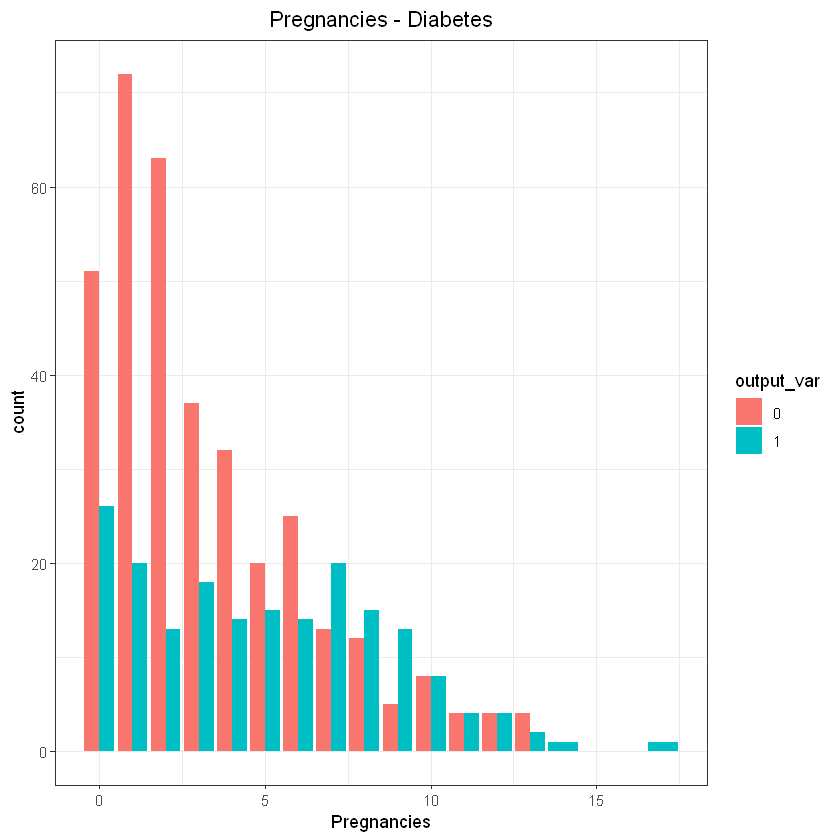

Warning message:
"position_dodge requires non-overlapping x intervals"

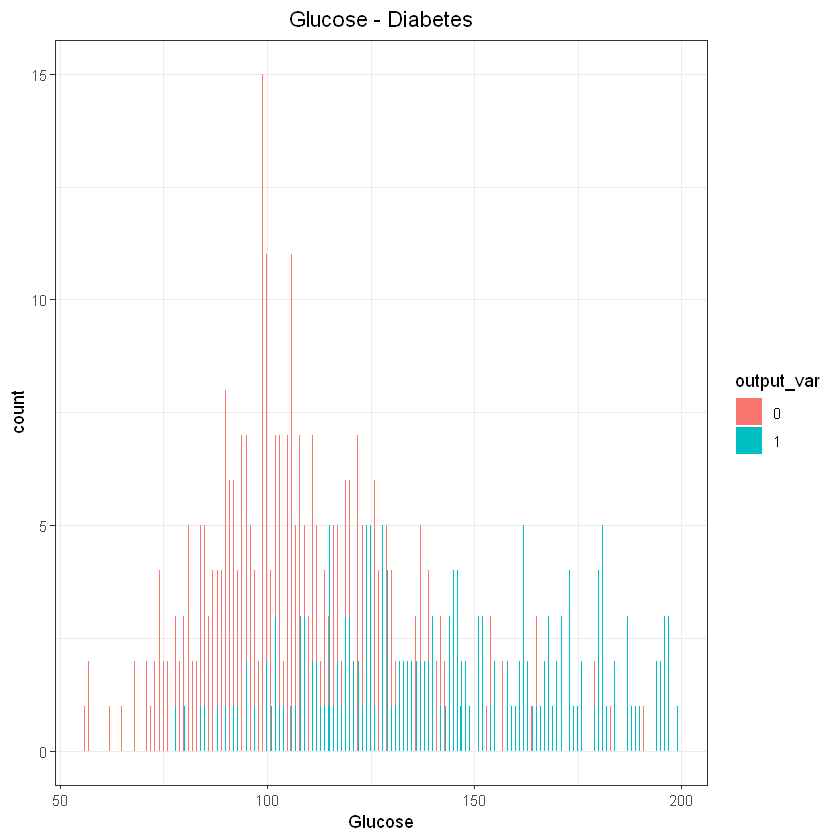

Warning message:
"position_dodge requires non-overlapping x intervals"

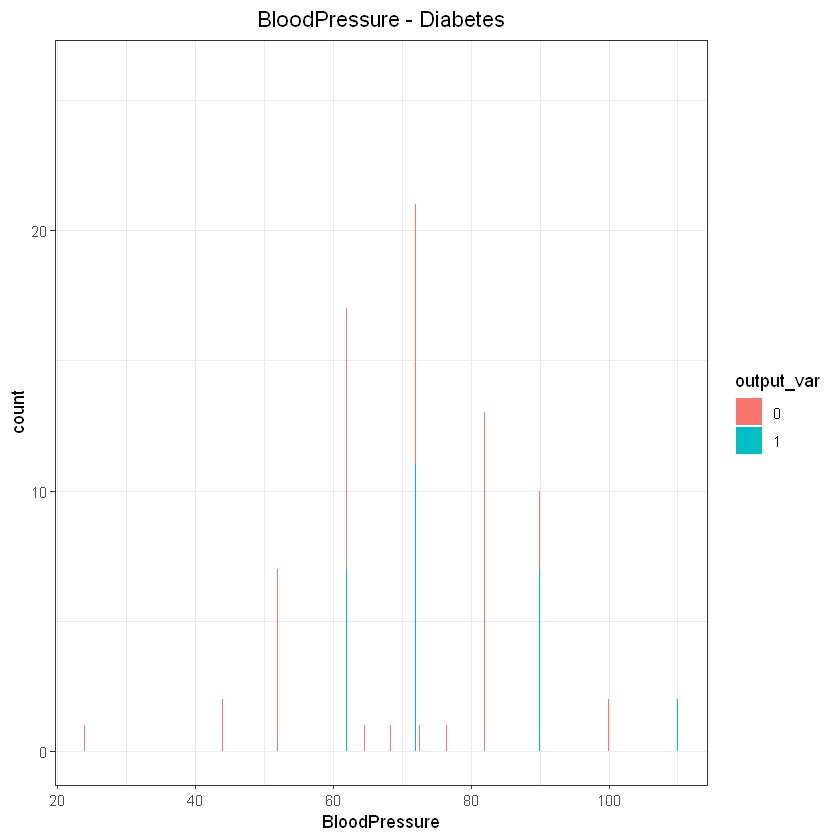

Warning message:
"position_dodge requires non-overlapping x intervals"

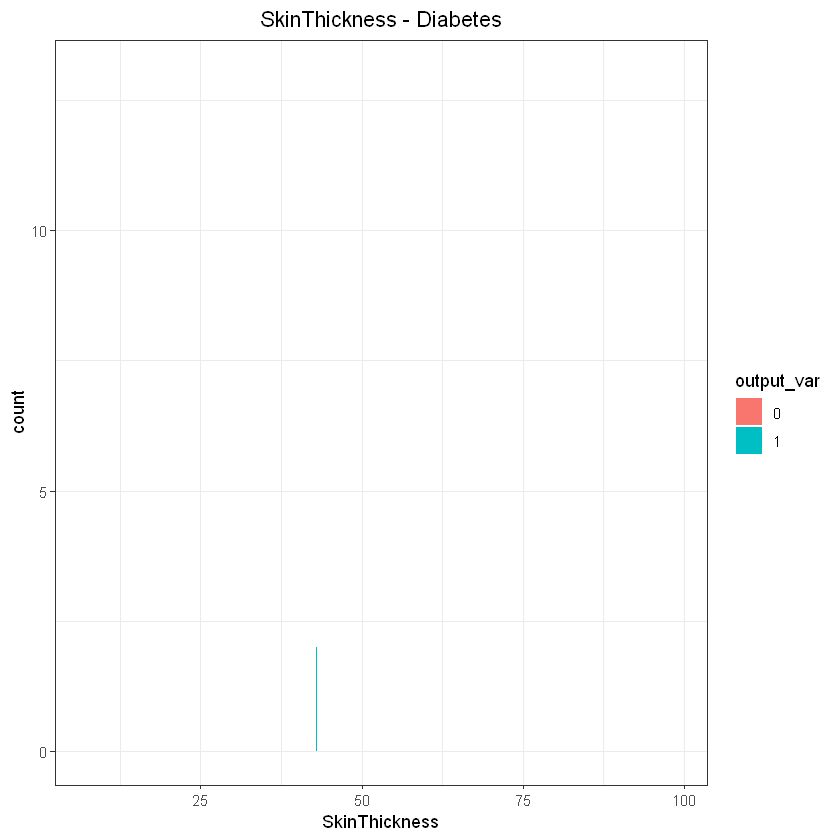

Warning message:
"position_dodge requires non-overlapping x intervals"

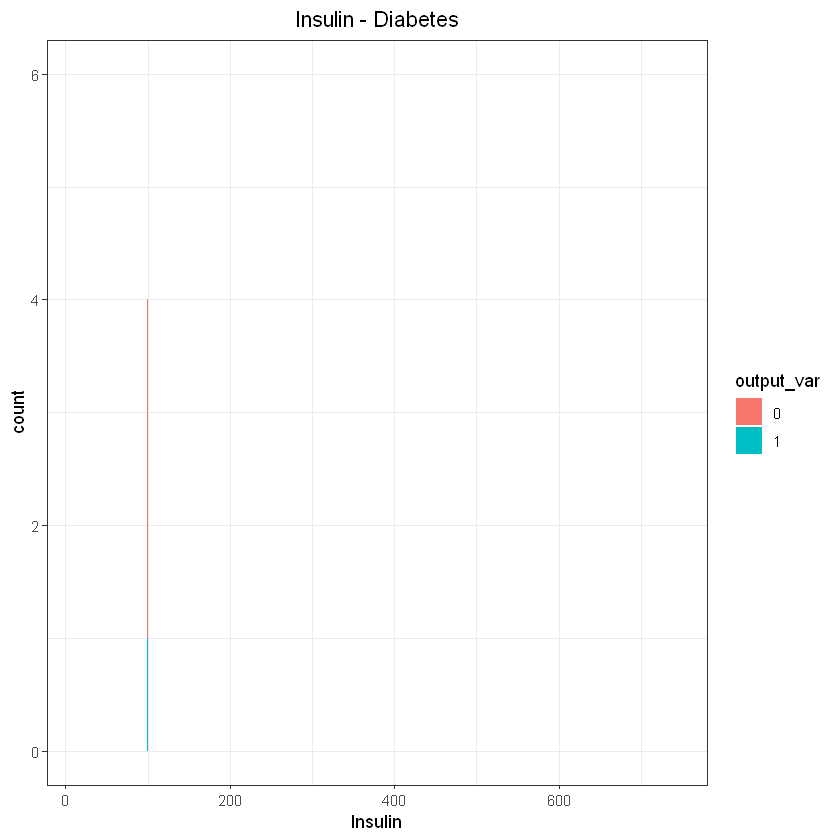

Warning message:
"position_dodge requires non-overlapping x intervals"

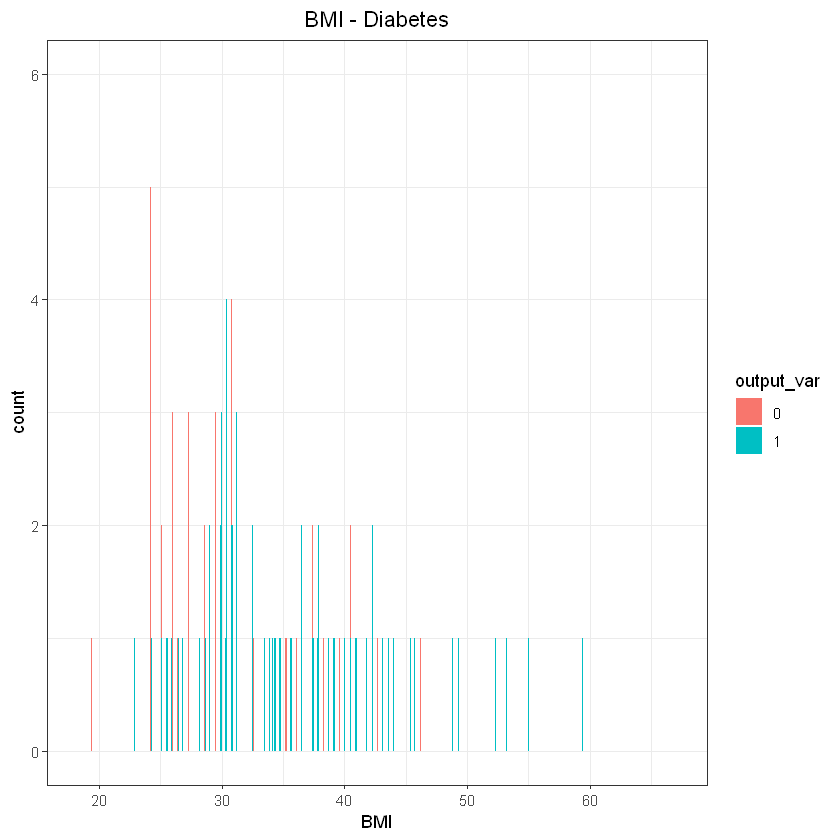

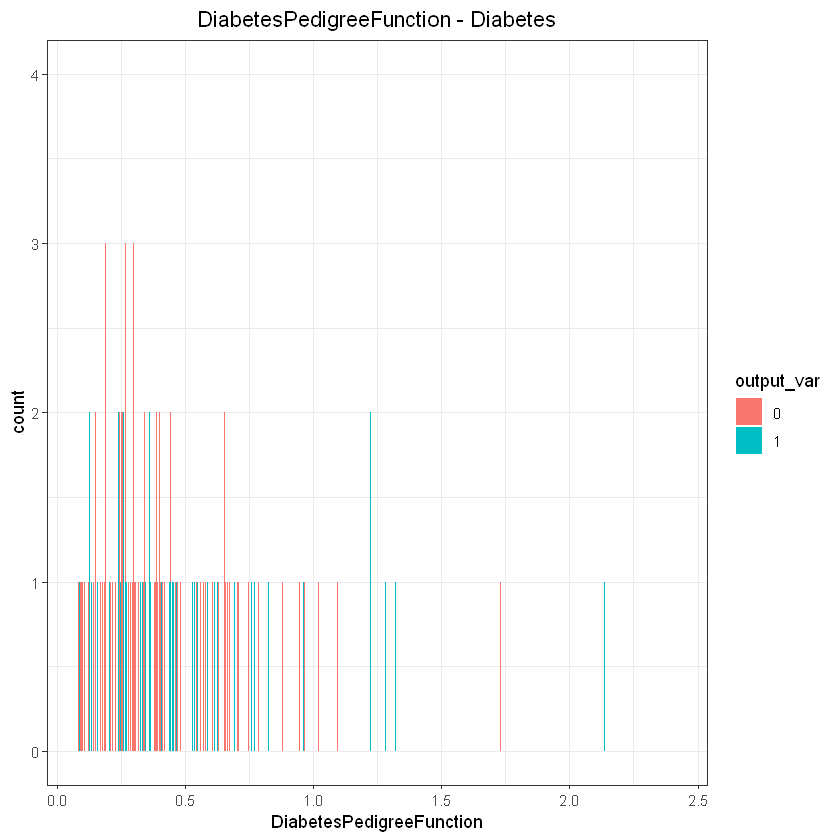

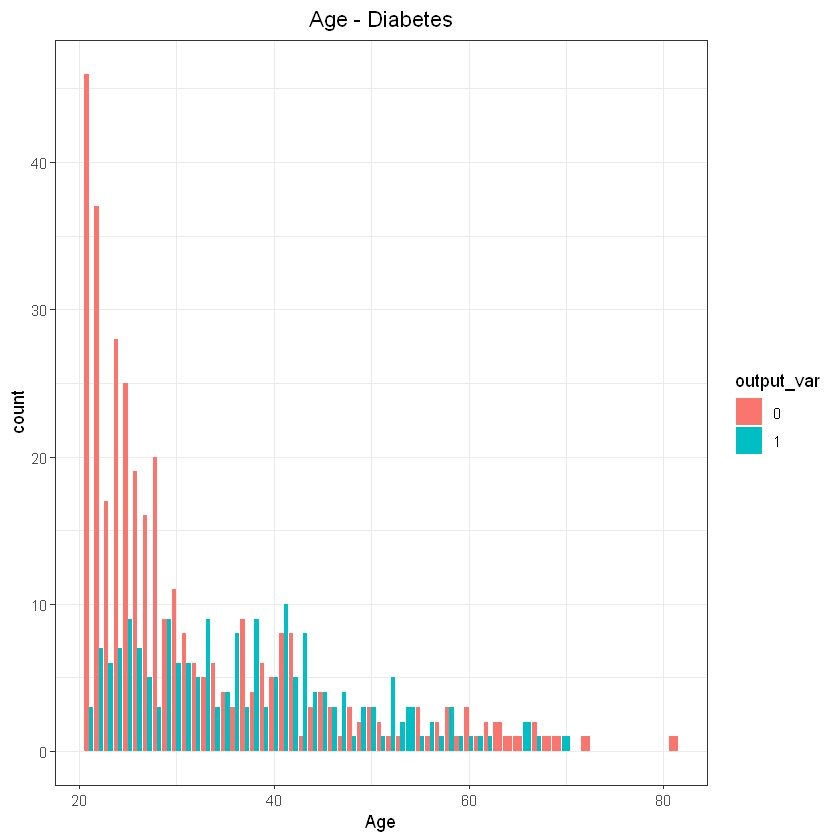

In [72]:
bivar_graph <- function(bivar_name, bivar, data, output_var) {
  
  g_1 <- ggplot(data = data, aes(x = bivar, fill = output_var)) +
          geom_bar(stat='count', position='dodge') +
          theme_bw() +
          labs( title = paste(bivar_name,"- Diabetes", sep =" "), x = bivar_name) +
          theme(plot.title = element_text(hjust = 0.5))
   
  plot(g_1)
}

for (x in 1:(ncol(training)-1)) {
  bivar_graph(bivar_name = names(training)[x], bivar = training[,x], data = training, output_var = training[,'Diabetes'])
}

In [74]:
install.packages("ranger")

package 'ranger' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpoxxEgc\downloaded_packages


In [75]:
library(ranger)

Warning message:
"package 'ranger' was built under R version 3.6.3"

In [77]:
Y = diabetes[,dim(diabetes)[2]]
X = diabetes[,1:(dim(diabetes)[2]-1)]

In [78]:
fullModel = lm(Y~X[,1]+X[,2]
    +X[,3]+X[,4]+X[,5]
    +X[,6]+X[,7]+X[,8]) 
baseModel = lm(Y~1)

Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"

In [80]:
library("e1071") 

In [84]:
Accuracy_p<-numeric(10)
for (l in 1:10) {
  sample_size <- floor(0.90 * nrow(diabetes))
  train_ind <- sample(seq_len(nrow(diabetes)), size = sample_size)
  train <- diabetes[train_ind, ]
  test <- diabetes[-train_ind, ]
  train$Diabetes <- as.factor(train$Diabetes)
  test$Diabetes <- as.factor(test$Diabetes)
  nb <- naiveBayes(Diabetes~., data = train)
  z<-predict(nb, test)
  z
  Acc<-table(test[,9],z)
  Accuracy_p[l] <- sum(diag(Acc))/sum(Acc)*100 
}
Experiments<-c(1:10)
NAIVE_Bayes <- data.frame(Experiments,Accuracy_p)
NAIVE_Bayes
Average<-sum(Accuracy_p)/10
Average

Experiments,Accuracy_p
1,71.42857
2,79.22078
3,70.12987
4,81.81818
5,76.62338
6,76.62338
7,85.71429
8,77.92208
9,76.62338
10,79.22078


[1] 77.53247

In [104]:
model <- glm(Diabetes~.,data=diabetes,family = binomial)
smodel <- step(model)


Start:  AIC=729.18
Diabetes ~ Pregnancies + Glucose + BloodPressure + SkinThickness + 
    Insulin + BMI + DiabetesPedigreeFunction + Age

                           Df Deviance    AIC
- SkinThickness             1   711.21 727.21
- Insulin                   1   711.59 727.59
- BloodPressure             1   712.51 728.51
<none>                          711.18 729.18
- Age                       1   713.45 729.45
- DiabetesPedigreeFunction  1   720.00 736.00
- Pregnancies               1   725.83 741.83
- BMI                       1   735.34 751.34
- Glucose                   1   812.20 828.20

Step:  AIC=727.21
Diabetes ~ Pregnancies + Glucose + BloodPressure + Insulin + 
    BMI + DiabetesPedigreeFunction + Age

                           Df Deviance    AIC
- Insulin                   1   711.62 725.62
- BloodPressure             1   712.54 726.54
<none>                          711.21 727.21
- Age                       1   713.54 727.54
- DiabetesPedigreeFunction  1   720.14 734.14
- 

# he final model chosen with AIC as the criterion for selection generated a logistic regression model with the lowest AIC value of 593.85 as below.

In [94]:
install.packages("boot")

package 'boot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpoxxEgc\downloaded_packages


In [95]:
library(boot)

Warning message:
"package 'boot' was built under R version 3.6.3"
Attaching package: 'boot'

The following object is masked from 'package:lattice':

    melanoma



In [119]:

detach("package:pROC", unload = TRUE)
install.packages("pROC", dependencies=TRUE)


also installing the dependencies 'FNN', 'kernlab', 'mclust', 'multicool', 'fontBitstreamVera', 'fontLiberation', 'systemfonts', 'ks', 'diffobj', 'fontquiver', 'freetypeharfbuzz', 'gdtools', 'microbenchmark', 'logcondens', 'vdiffr'



package 'FNN' successfully unpacked and MD5 sums checked
package 'kernlab' successfully unpacked and MD5 sums checked
package 'mclust' successfully unpacked and MD5 sums checked
package 'multicool' successfully unpacked and MD5 sums checked
package 'fontBitstreamVera' successfully unpacked and MD5 sums checked
package 'fontLiberation' successfully unpacked and MD5 sums checked
package 'systemfonts' successfully unpacked and MD5 sums checked
package 'ks' successfully unpacked and MD5 sums checked
package 'diffobj' successfully unpacked and MD5 sums checked
package 'fontquiver' successfully unpacked and MD5 sums checked
package 'freetypeharfbuzz' successfully unpacked and MD5 sums checked
package 'gdtools' successfully unpacked and MD5 sums checked
package 'microbenchmark' successfully unpacked and MD5 sums checked
package 'logcondens' successfully unpacked and MD5 sums checked
package 'vdiffr' successfully unpacked and MD5 sums checked
package 'pROC' successfully unpacked and MD5 sums c

Warning message:
"cannot remove prior installation of package 'pROC'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying D:\anaconda\envs\R_env\Lib\R\library\00LOCK\pROC\libs\x64\pROC.dll to D:\anaconda\envs\R_env\Lib\R\library\pROC\libs\x64\pROC.dll: Permission denied"Warning message:
"restored 'pROC'"


The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpoxxEgc\downloaded_packages


In [120]:
library(pROC)

Warning message:
"package 'pROC' was built under R version 3.6.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



In [130]:
par(mfrow = c(1,2))
pred.in <- predict(model.test,newdata = diabetes,type = "response")
prediction.in <- ifelse(pred.in<0.29,0,1)
tab<-table(as.factor(diabetes$Diabetes),prediction.in)
x<- diabetes$Diabetes=="1"

Setting levels: control = FALSE, case = TRUE
Setting direction: controls < cases


NULL

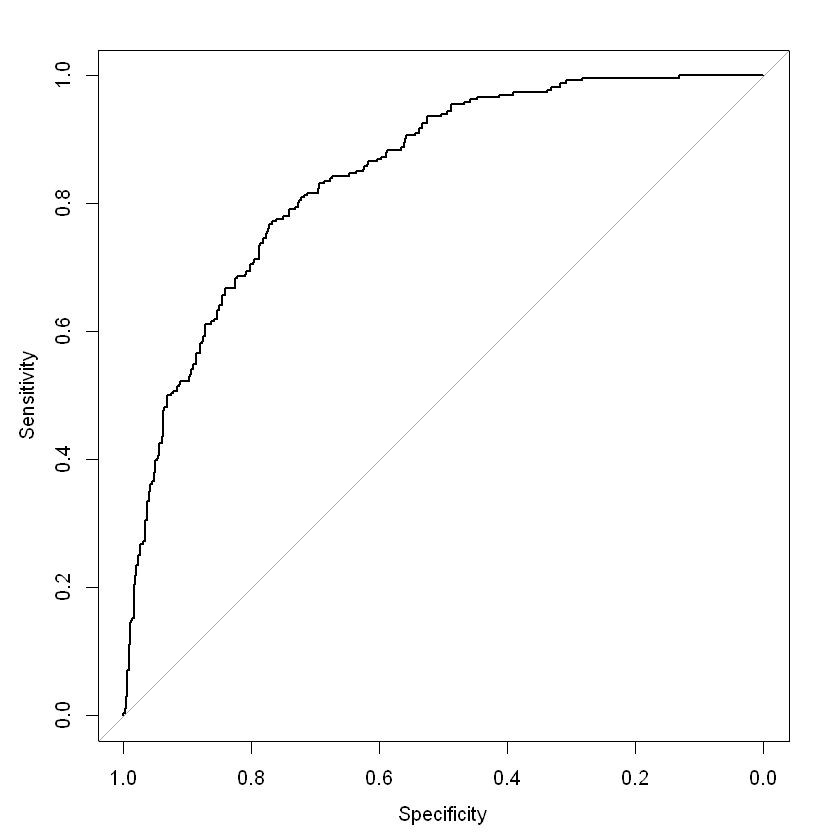

In [134]:
plot.roc(x, pred.in)$vol.roc

Setting levels: control = FALSE, case = TRUE
Setting direction: controls < cases


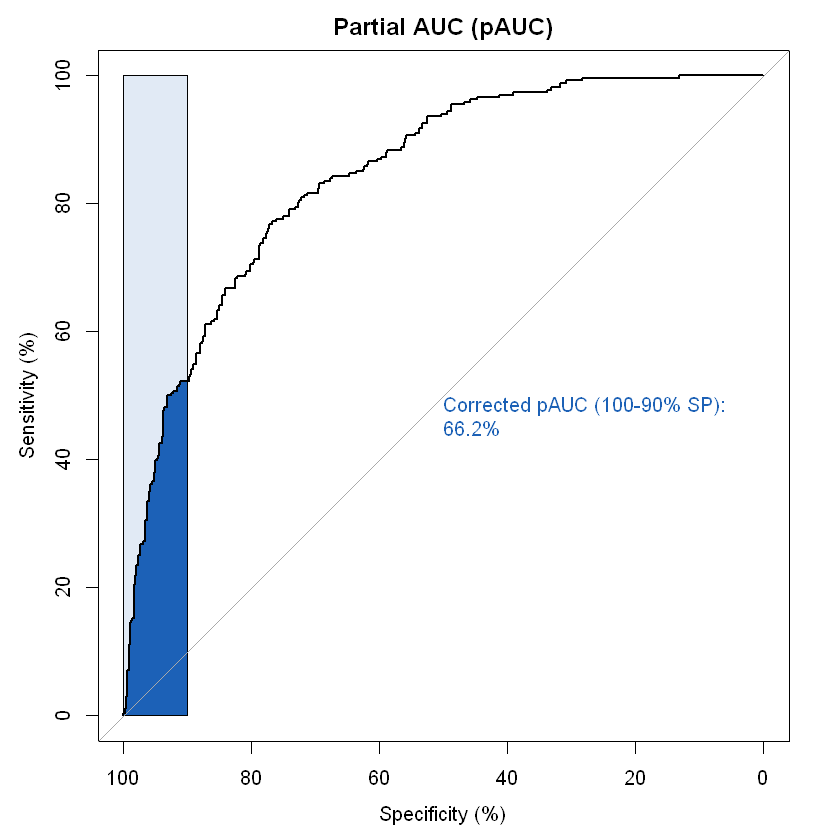

In [129]:
plot.roc(x, pred.in,          # data
         percent = TRUE,                    # show all values in percent
         partial.auc=c(100, 90), 
         partial.auc.correct=TRUE,          # define a partial AUC (pAUC)
         print.auc=TRUE,                    
         #display pAUC value on the plot with following options:
         print.auc.pattern = "Corrected pAUC (100-90%% SP):\n%.1f%%",
         print.auc.col = "#1c61b6",
         auc.polygon = TRUE, 
         auc.polygon.col = "#1c61b7",       # show pAUC as a polygon
         max.auc.polygon = TRUE, 
         max.auc.polygon.col = "#1c61b622", # also show the 100% polygon
         main = "Partial AUC (pAUC)")

In [91]:
# Final model using Logistic Regression
model.test <- glm(formula = Diabetes ~ Pregnancies + Glucose + BMI + DiabetesPedigreeFunction, family = binomial, data = diabetes)

summary(model.test)


Call:
glm(formula = Diabetes ~ Pregnancies + Glucose + BMI + DiabetesPedigreeFunction, 
    family = binomial, data = diabetes)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8325  -0.7218  -0.3977   0.7234   2.4373  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -9.219566   0.706603 -13.048  < 2e-16 ***
Pregnancies               0.142812   0.027572   5.180 2.22e-07 ***
Glucose                   0.037002   0.003493  10.594  < 2e-16 ***
BMI                       0.089238   0.014728   6.059 1.37e-09 ***
DiabetesPedigreeFunction  0.891939   0.295626   3.017  0.00255 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 993.48  on 767  degrees of freedom
Residual deviance: 714.26  on 763  degrees of freedom
AIC: 724.26

Number of Fisher Scoring iterations: 5


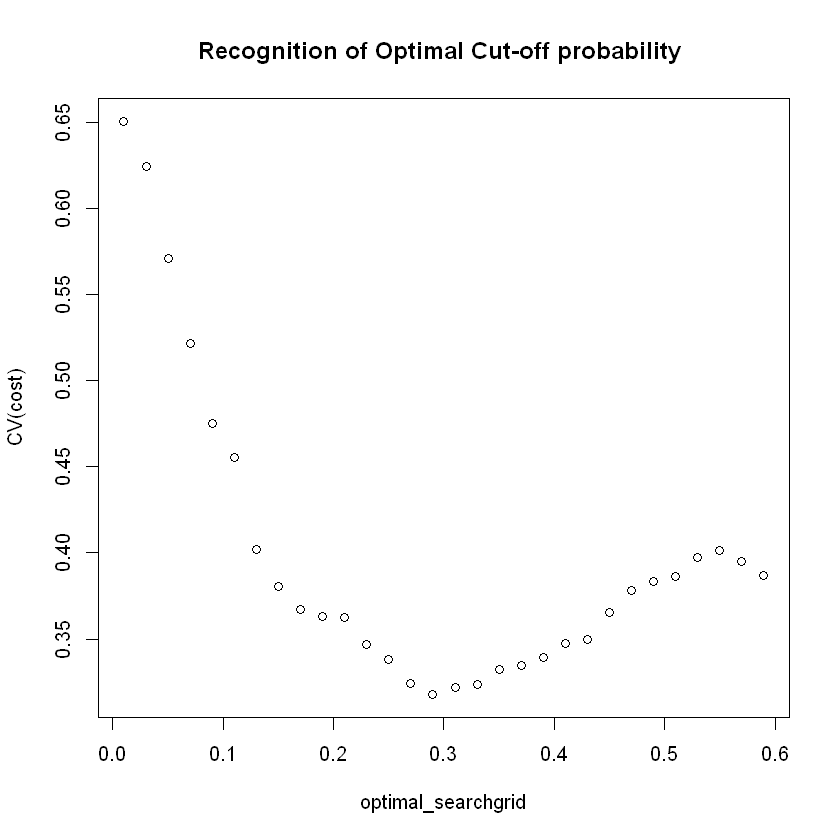

In [106]:
optimal_searchgrid = seq(0.01, 0.6, 0.02)
result = cbind(optimal_searchgrid, NA)
cost1 <- function(r, pi) {
  weight1 = 2
  weight0 = 1
  a1 = (r == 1) & (pi < pcut)  
  a0 = (r == 0) & (pi > pcut)  
  return(mean(weight1 * a1 + weight0 * a0))
}
for (i in 1:length(searchgrid)) {
  pcut <- result[i, 1]
  result[i, 2] <- cv.glm(data = diabetes, glmfit = model.test, cost = cost1, 
                         K = 4)$delta[2]
}
plot(result, ylab = "CV(cost)",main = "Recognition of Optimal Cut-off probability ")

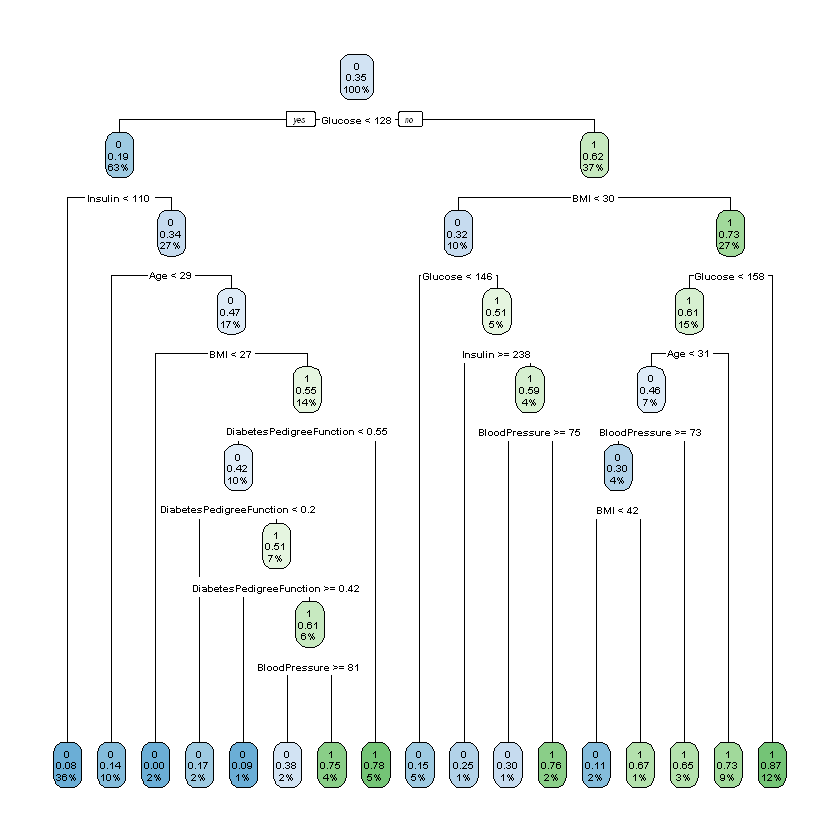

In [102]:
tree <- rpart(Diabetes~., data=diabetes, method="class")
rpart.plot(tree)

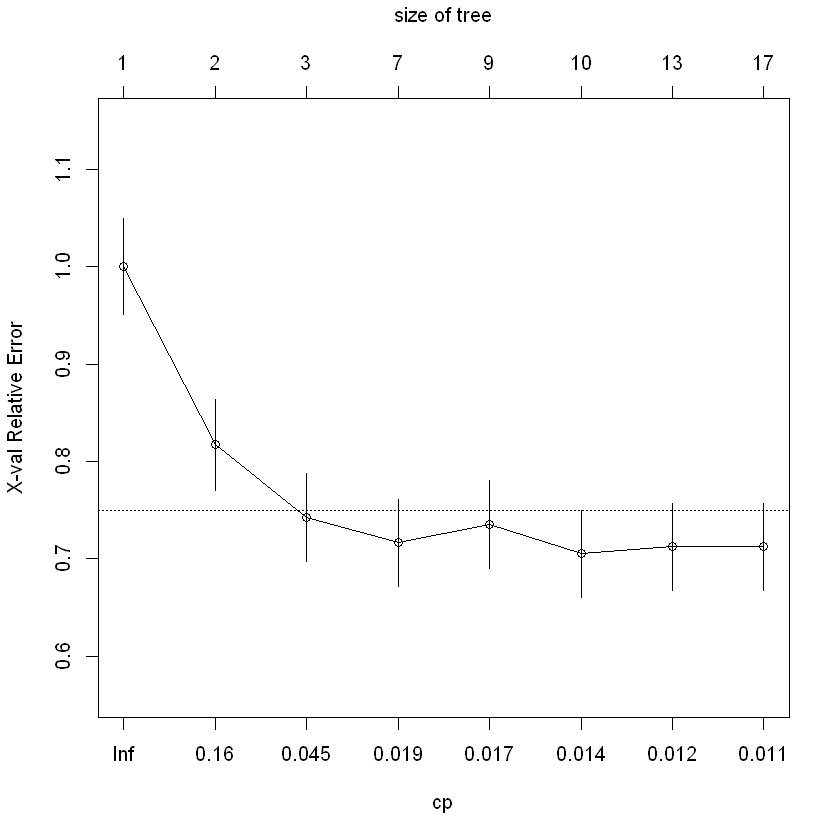

In [103]:
plotcp(tree)

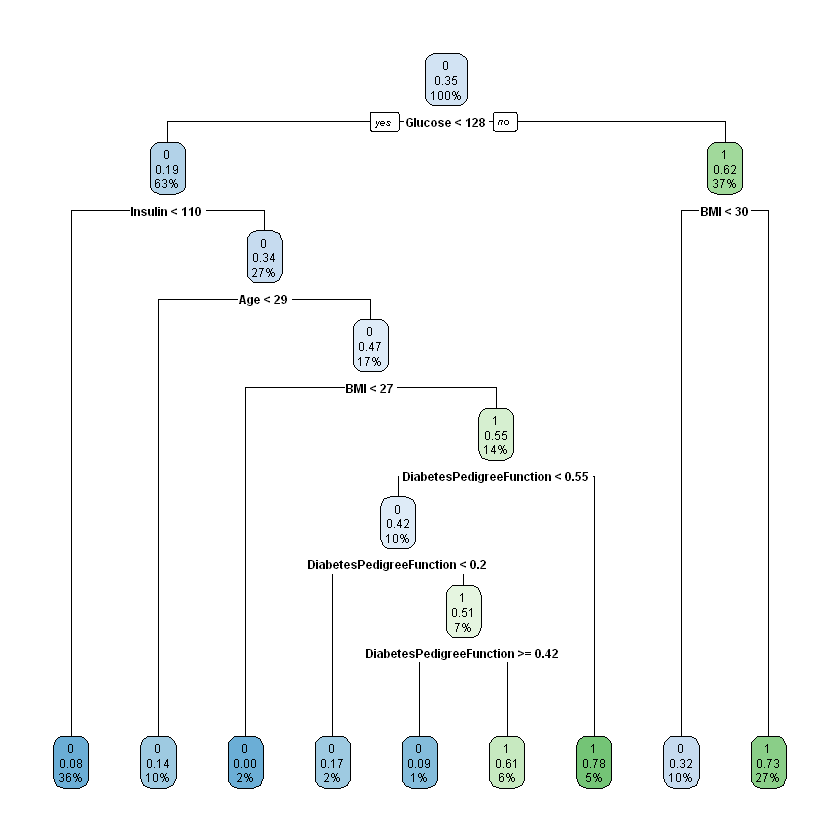

In [111]:
# Pruning the tree
tree1<- rpart(Diabetes~., data=diabetes, method="class",cp=0.016)
rpart.plot(tree1)

In [4]:
install.packages("ggthemes")
library(ggthemes)

Warning message:
"package 'ggthemes' is in use and will not be installed"

In [5]:
library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
library(dplyr)
library(ggthemes)
library(RColorBrewer)
library(pROC)
library(caret)

# Impact of Glucose on Diabetes

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


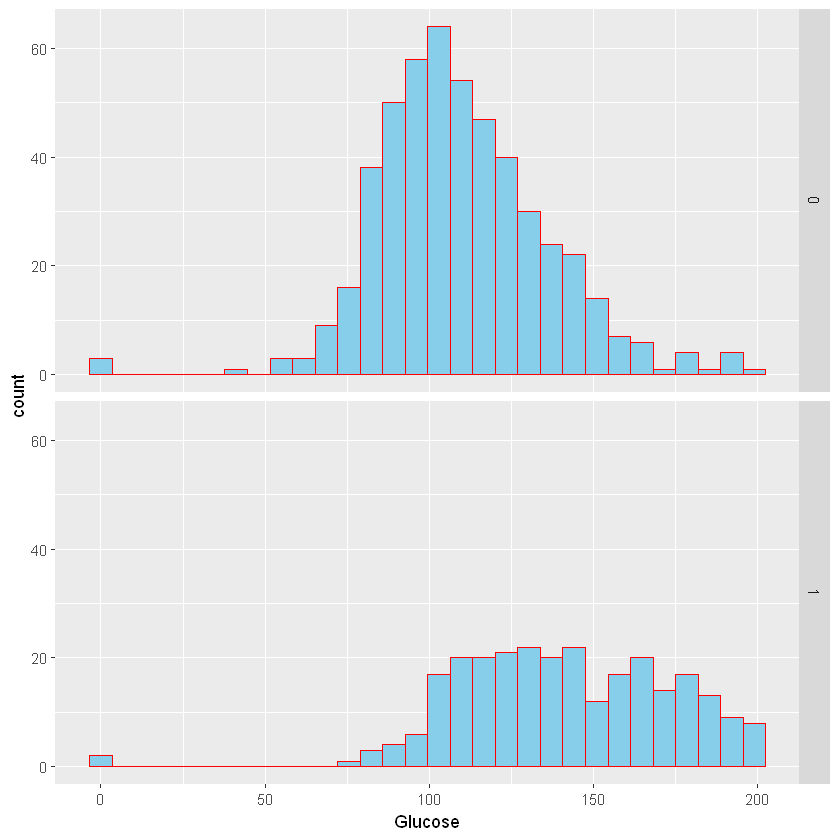

In [35]:
ggplot(diabetes,aes(x=Glucose))+geom_histogram(fill="sky blue",colour="black")+ facet_grid(Diabetes~.)

In [39]:
t.test(Glucose ~ Diabetes, diabetes)


	Welch Two Sample t-test

data:  Glucose by Diabetes
t = -13.752, df = 461.33, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -35.74707 -26.80786
sample estimates:
mean in group 0 mean in group 1 
       109.9800        141.2575 


In [42]:
install.packages("needs")
library(needs)
needs(ggplot2,
      dplyr,
      corrplot,
      gridExtra,
      rpart.plot,
      e1071,
      mice,
      DMwR,
      pROC,
      caTools,
      caret,
      doMC)

package 'needs' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpoxxEgc\downloaded_packages



Load `package:needs` in an interactive session to set auto-load flag



installing packages:
rpart.plot
mice
doMC


Warning message:
"package 'doMC' is not available (for R version 3.6.1)"

package 'rpart.plot' successfully unpacked and MD5 sums checked
package 'mice' successfully unpacked and MD5 sums checked


ERROR: Error in FUN(X[[i]], ...): there is no package called 'doMC'


In [43]:
fitControl <- trainControl(method = "cv",
                           number = 10,
                           classProbs = TRUE,
                           summaryFunction = twoClassSummary)

In [45]:
nrows <- NROW(diabetes)
set.seed(218)                           # fix random value
index <- sample(1:nrows, 0.7 * nrows)   # shuffle and divide
# train <- diab                         # 768 test data (100%)
train <- diabetes[index,]                   # 537 test data (70%)
test <- diabetes[-index,]    

In [52]:
biological_data <- diabetes[,setdiff(names(diabetes), c('Outcome', 'Pregnancies'))]
features_miss_num <- apply(biological_data, 2, function(x) sum(x<=0))
features_miss <- names(biological_data)[ features_miss_num > 0]
features_miss_num

Glucose            BloodPressure            SkinThickness 
                     197                      752                      231 
                 Insulin                      BMI DiabetesPedigreeFunction 
                     518                       11                        0 
                     Age                 Diabetes 
                       0                      500

In [53]:
rows_errors <- apply(biological_data, 1, function(x) sum(x<=0)>1) 
sum(rows_errors)

[1] 656

In [55]:
biological_data[biological_data<=0] <- NA
diabetes[, names(biological_data)] <- biological_data

Warning message in Ops.factor(left, right):
"'<=' not meaningful for factors"

In [56]:
dat_original <- diabetes
diabetes[,-9] <- knnImputation(diabetes[,-9], k=5)

In [58]:
prop.table(table(diabetes$Diabetes))


        0         1 
0.6510417 0.3489583 

In [59]:
set.seed(1234)
dindex <- createDataPartition(diabetes$Diabetes, p=0.7, list=FALSE)
train_data <- dat_original[dindex,]
test_data <- dat_original[-dindex,]

In [60]:
mice_train_mod <- mice(train_data[, features_miss], method='rf', seed=1234, printFlag = FALSE) 
mice_test_mod <- mice(test_data[, features_miss], method='rf', seed=1234, printFlag = FALSE) 

In [61]:
train_data[, features_miss] <- complete(mice_train_mod)
test_data[, features_miss] <- complete(mice_test_mod)

In [62]:
table(train_data$Diabetes)


  0   1 
350 188 

In [67]:
library(pROC) #ROC
library(caTools) #AUC

In [63]:
fitControl <- trainControl(method = "cv",
                           number = 10,
                           classProbs = TRUE,
                           summaryFunction = twoClassSummary)

In [68]:
model_rpart <- train(Diabetes~.,
                      train_data,
                      method="rpart",
                      metric="ROC",
                      tuneLength=20,
                      trControl=fitControl)


ERROR: Error: At least one of the class levels is not a valid R variable name; This will cause errors when class probabilities are generated because the variables names will be converted to  X0, X1 . Please use factor levels that can be used as valid R variable names  (see ?make.names for help).


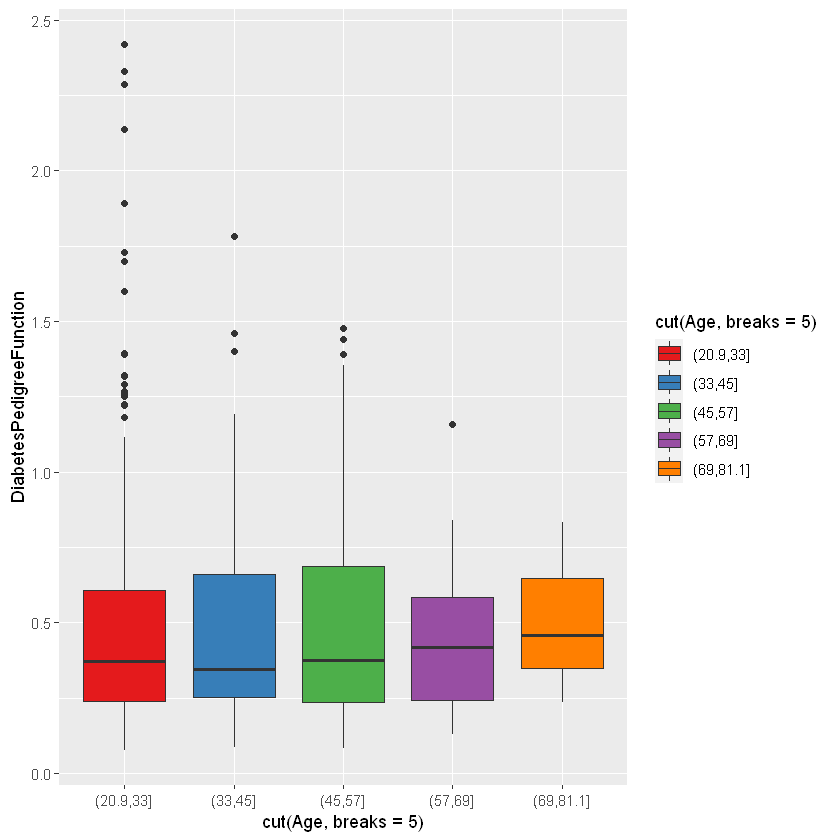

In [17]:
ggplot(diabetes,aes(x=cut(Age,breaks=5),y=DiabetesPedigreeFunction,fill=cut(Age,breaks=5)))+geom_boxplot()+scale_fill_brewer(palette="Set1")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


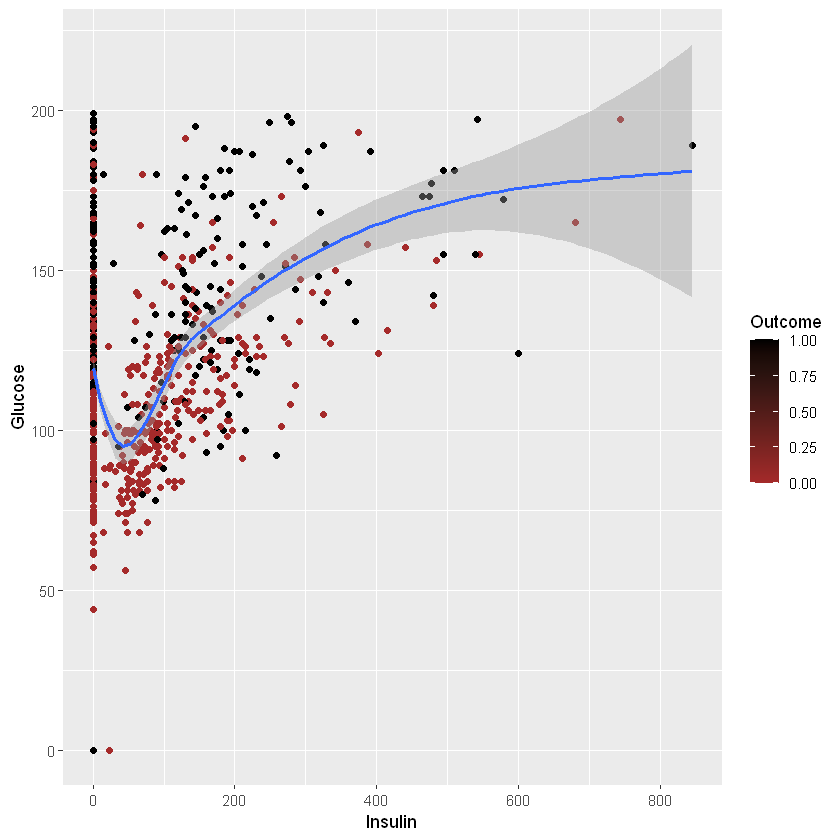

In [33]:
ggplot(diabetes,aes(x=Insulin,y=Glucose))+geom_point(aes(color=Outcome))+geom_smooth()+scale_color_gradient(low = 'brown', high = 'black')

In [50]:
colnames(diabetes)[9] <- "Diabetes"

# Reshape the datasets

In [51]:
diabetes$Diabetes <- as.factor(diabetes$Diabetes)
levels(diabetes$Diabetes) <- c("0","1")

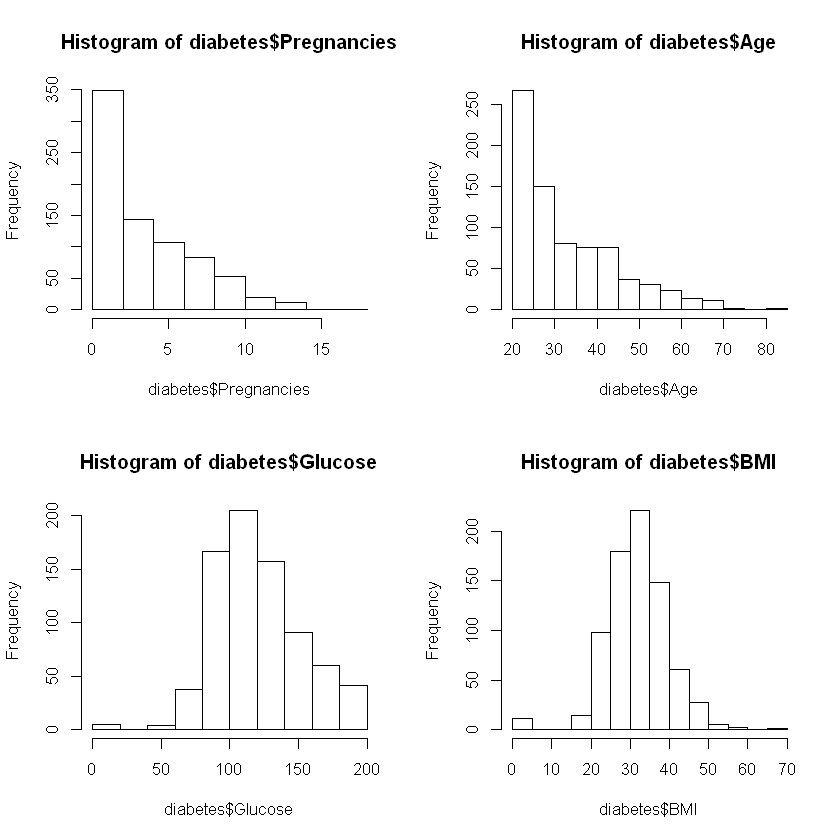

In [27]:
par(mfrow = c(2, 2))
hist(diabetes$Pregnancies)
hist(diabetes$Age)
hist(diabetes$Glucose)
hist(diabetes$BMI)


	Welch Two Sample t-test

data:  with$DiabetesPedigreeFunction and without$DiabetesPedigreeFunction
t = 4.5768, df = 454.51, p-value = 6.1e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.06891135 0.17262065
sample estimates:
mean of x mean of y 
 0.550500  0.429734 


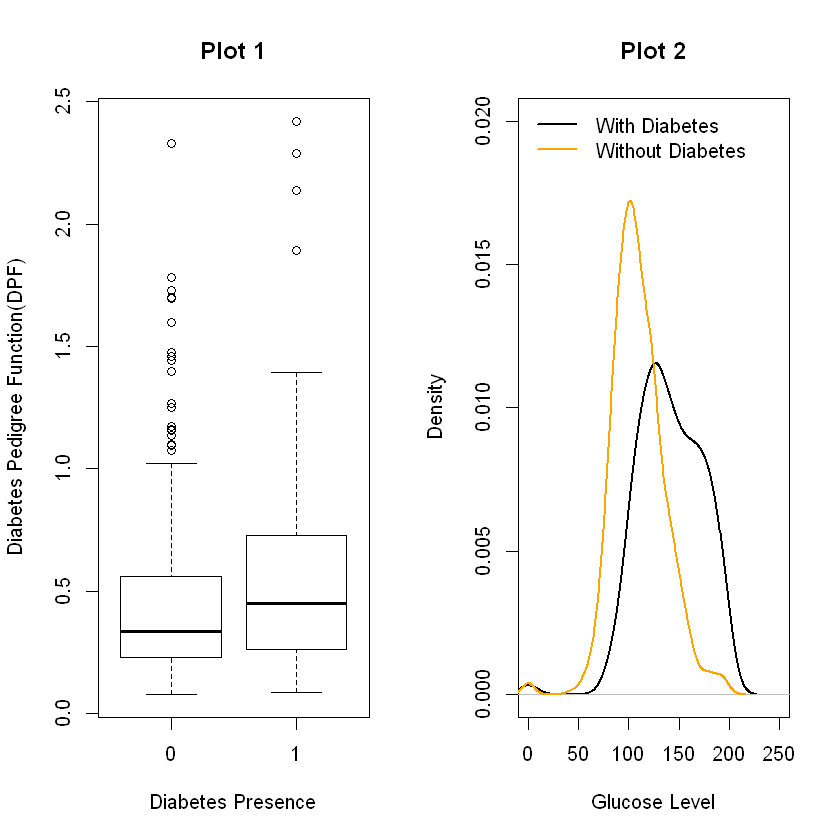

In [41]:
par(mfrow = c(1, 2))

# boxplot
with(diabetes, boxplot(DiabetesPedigreeFunction ~ diabetes, 
                       ylab = "Diabetes Pedigree Function(DPF)", 
                       xlab = " Diabetes Presence ",
                       main = "Plot 1",
                       outline = TRUE))

with <- diabetes[diabetes$diabetes == 1, ]
without <- diabetes[diabetes$diabetes == 0, ]

# density plot
plot(density(with$Glucose), 
     xlim = c(0, 250),
     ylim = c(0.00, 0.02),
     xlab = "Glucose Level",
     main = "Plot 2",
     lwd = 2)
lines(density(without$Glucose), 
      col = "orange",
      lwd = 2)
legend("topleft", 
       col = c("black", "orange"), 
       legend = c("With Diabetes", "Without Diabetes"), 
       lwd = 2,
       bty = "n")

# two sample t-test with unequal variance
t.test(with$DiabetesPedigreeFunction, without$DiabetesPedigreeFunction)

In [6]:
install.packages("DMwR")
library(DMwR)

package 'DMwR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpW6XKLO\downloaded_packages


Warning message:
"package 'DMwR' was built under R version 3.6.3"Loading required package: lattice
Loading required package: grid
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [16]:
diabetes1 <- diabetes[,1:8]

# Outlier Scores

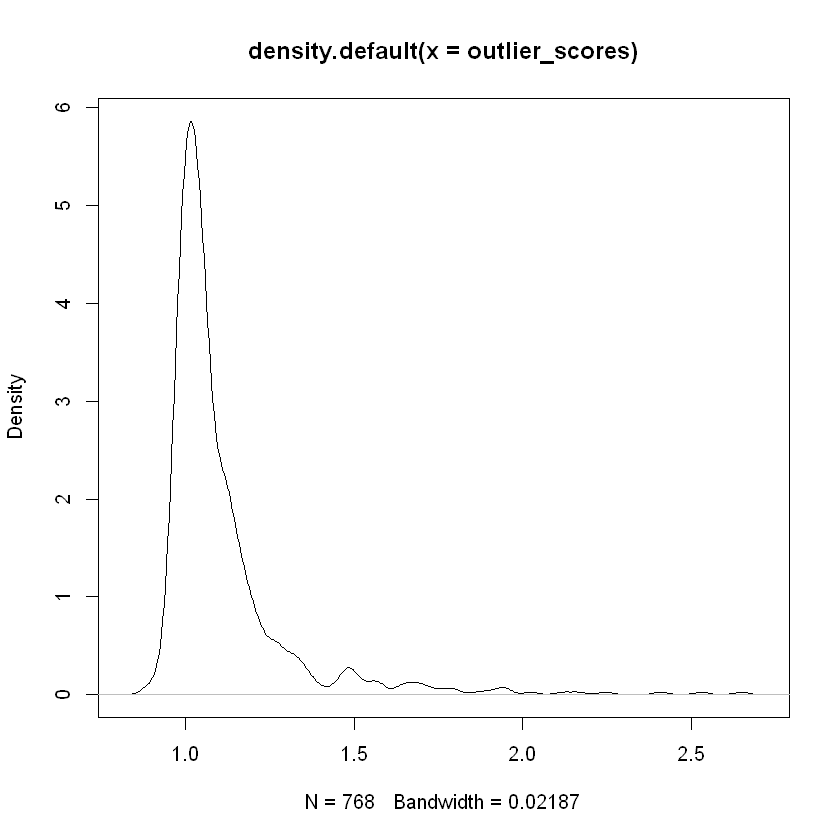

In [13]:
outlier_scores <- lofactor(diabetes1, k=5)
plot(density(outlier_scores))

In [14]:
outliers <- order(outlier_scores, decreasing=T)[1:5]
print(outliers)

[1]  14 580 146 454 107


# The five outliers obtained in the output are the row numbers in the diabetes1 data derived from the diabetes data set.

In [19]:
diabetes2 <- diabetes[,1:4]

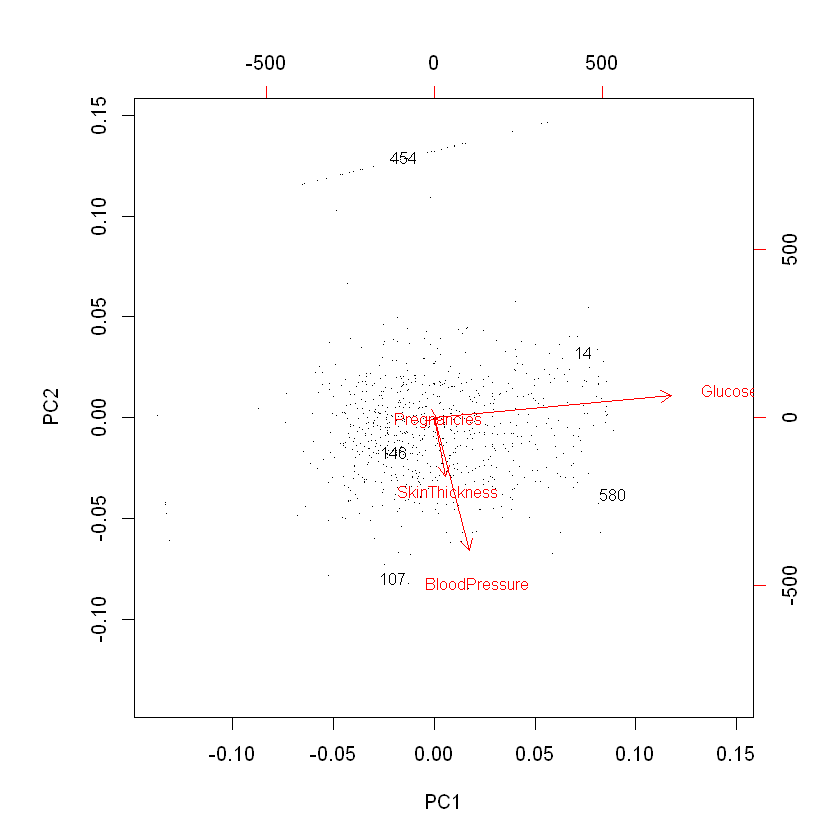

In [20]:
n <- nrow(diabetes2)
labels <- 1:n
labels[-outliers] <- "."
biplot(prcomp(diabetes2), cex=.8, xlabs=labels)

In [22]:
install.packages("Rlof")
library(Rlof)
outlier.scores <- lof(diabetes1, k=5) 
outlier.scores <- lof(diabetes1, k=c(5:10))

also installing the dependency 'doParallel'



package 'doParallel' successfully unpacked and MD5 sums checked
package 'Rlof' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpW6XKLO\downloaded_packages


Warning message:
"package 'Rlof' was built under R version 3.6.3"Loading required package: doParallel
Warning message:
"package 'doParallel' was built under R version 3.6.3"Loading required package: foreach
Loading required package: iterators
Loading required package: parallel


In [23]:
outlier.scores

5,6,7,8,9,10
1.0613907,1.0298421,1.0467206,1.0418848,1.0389602,1.0533413
1.0705368,1.0513517,1.0344773,1.0391998,0.9969303,1.0016080
1.0788718,1.1155262,1.1539958,1.1710755,1.1498865,1.1508931
1.0307673,1.0244947,1.0313417,0.9995388,0.9937247,0.9915746
1.1177098,1.1700120,1.1501680,1.1635447,1.1489838,1.1608783
0.9922391,0.9998666,0.9881822,0.9806000,0.9666334,0.9503265
1.2259494,1.2119998,1.1991214,1.2046533,1.1883885,1.1775825
1.0368723,0.9894997,1.0032288,0.9798629,0.9579307,0.9591304
1.0690388,1.1614844,1.2047715,1.1905248,1.1939616,1.0870710
2.0231907,1.9468283,1.9241779,1.8716457,1.8721911,1.8093466


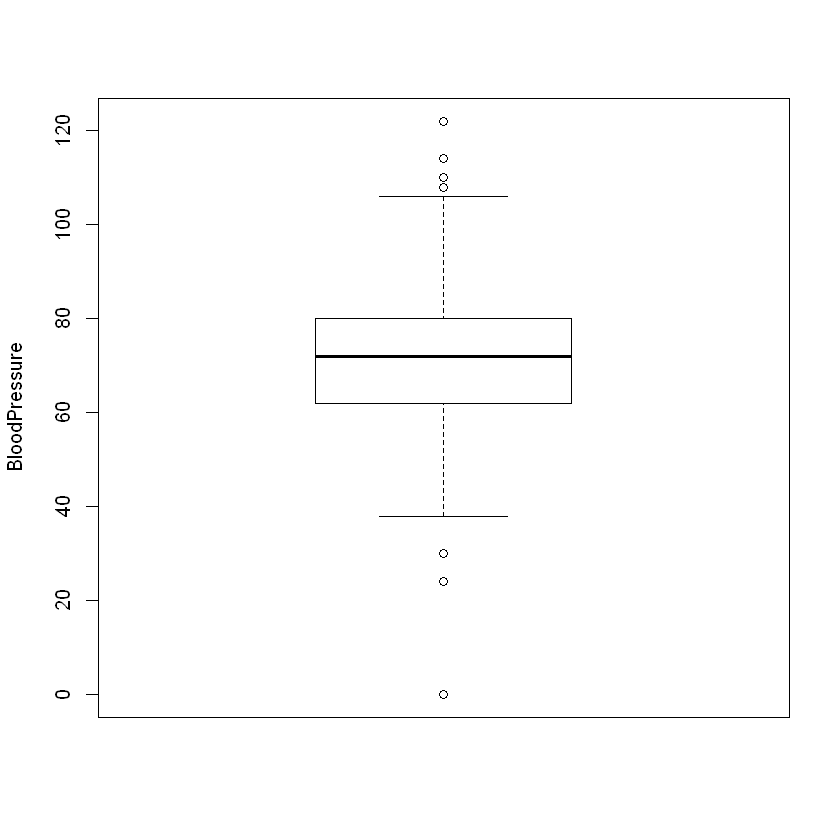

In [24]:
boxplot(diabetes$BloodPressure,
  ylab = "BloodPressure"
)

In [7]:
str(diabetes)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes                : Factor w/ 2 levels "No","Yes": 2 1 2 1 2 1 2 1 2 2 ...


In [8]:
library(knitr)

kable(head(diabetes))

Warning message:
"package 'knitr' was built under R version 3.6.3"



| Pregnancies| Glucose| BloodPressure| SkinThickness| Insulin|  BMI| DiabetesPedigreeFunction| Age|diabetes |
|-----------:|-------:|-------------:|-------------:|-------:|----:|------------------------:|---:|:--------|
|           6|     148|            72|            35|       0| 33.6|                    0.627|  50|Yes      |
|           1|      85|            66|            29|       0| 26.6|                    0.351|  31|No       |
|           8|     183|            64|             0|       0| 23.3|                    0.672|  32|Yes      |
|           1|      89|            66|            23|      94| 28.1|                    0.167|  21|No       |
|           0|     137|            40|            35|     168| 43.1|                    2.288|  33|Yes      |
|           5|     116|            74|             0|       0| 25.6|                    0.201|  30|No       |

# Correlation between each variables

In [10]:
install.packages("PerformanceAnalytics")

package 'PerformanceAnalytics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\Rtmp8G7kTI\downloaded_packages


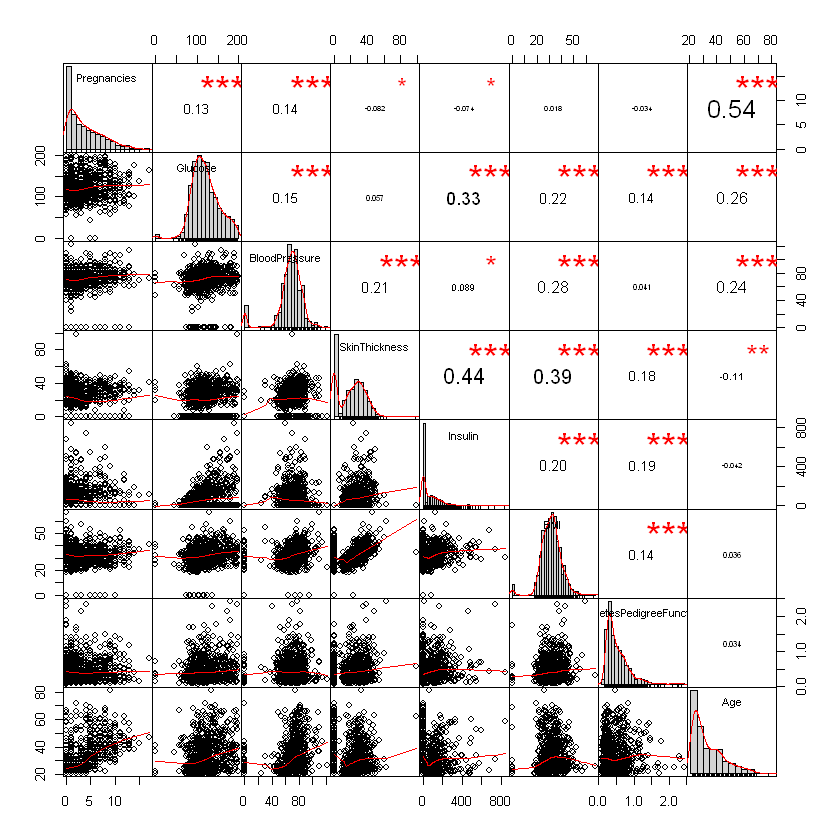

In [12]:
library(PerformanceAnalytics)
chart.Correlation(diabetes[,-9], histogram=TRUE, col="blue", pch=1, main="Chart Correlation of Variance")

# the relation between each variables (diabetes included)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'GGally' was built under R version 3.6.3"Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


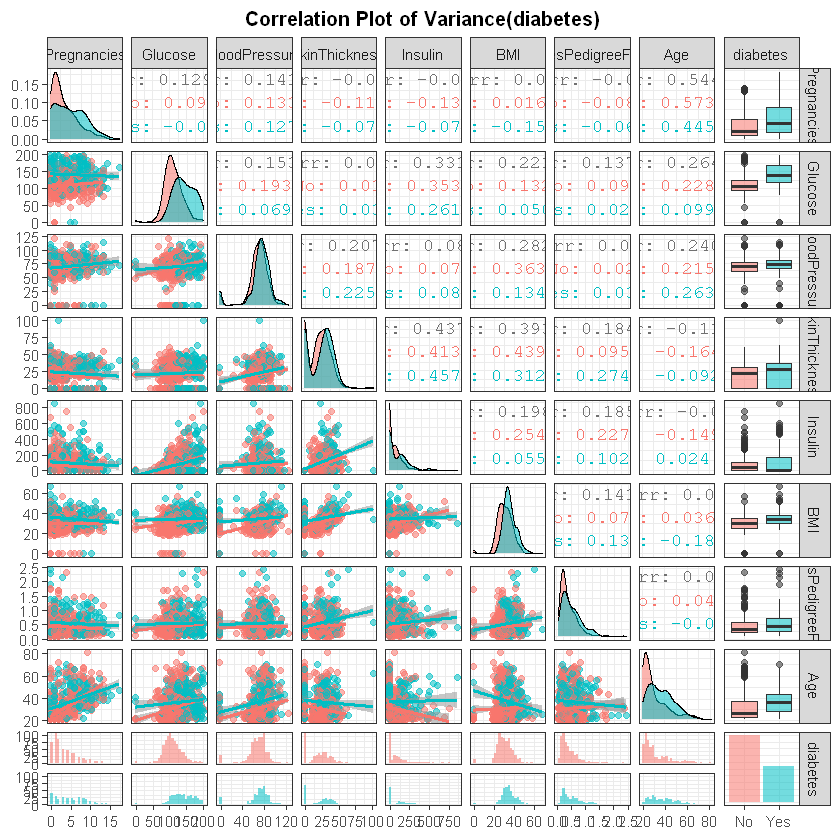

In [13]:
library(ggplot2)

library(GGally)

ggpairs(diabetes, aes(color=diabetes, alpha=0.75), lower=list(continuous="smooth"))+ theme_bw()+

labs(title="Correlation Plot of Variance(diabetes)")+

theme(plot.title=element_text(face='bold',color='black',hjust=0.5,size=12))

# By ggcorr, we can see high correlation in below variance

Pregnancies & Age : 0.5 => About 50% correlated to each other

SkinThickness - &Insulin, &BMI : 0.4 => About 40% correlated to each other

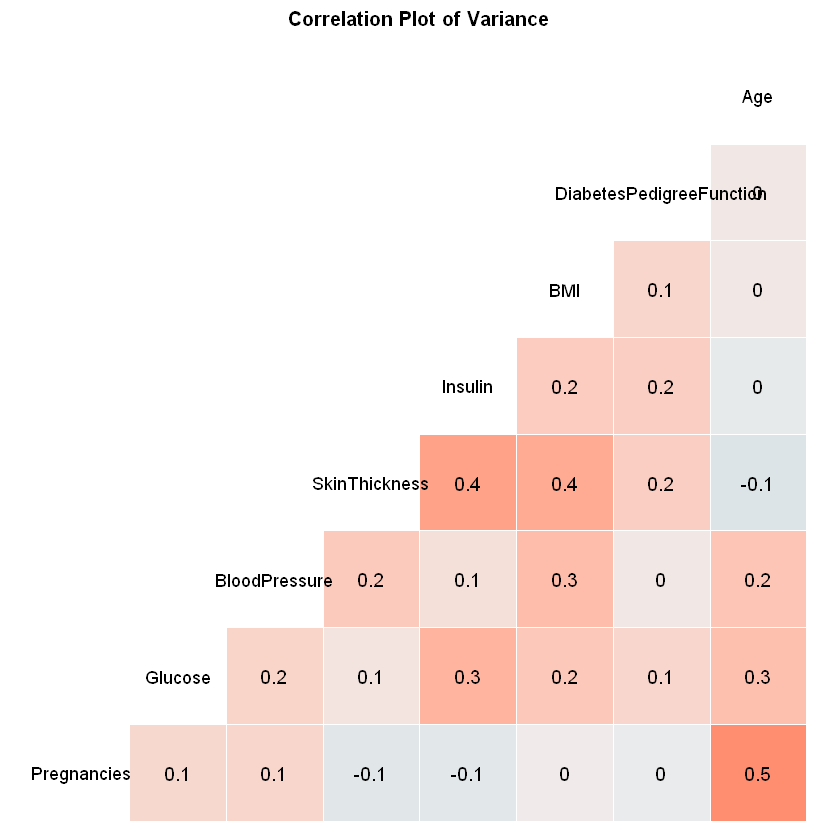

In [14]:
ggcorr(diabetes[,-9], name = "corr", label = TRUE)+

  theme(legend.position="none")+

labs(title="Correlation Plot of Variance")+

theme(plot.title=element_text(face='bold',color='black',hjust=0.5,size=12))

In [16]:
library(corrplot)

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


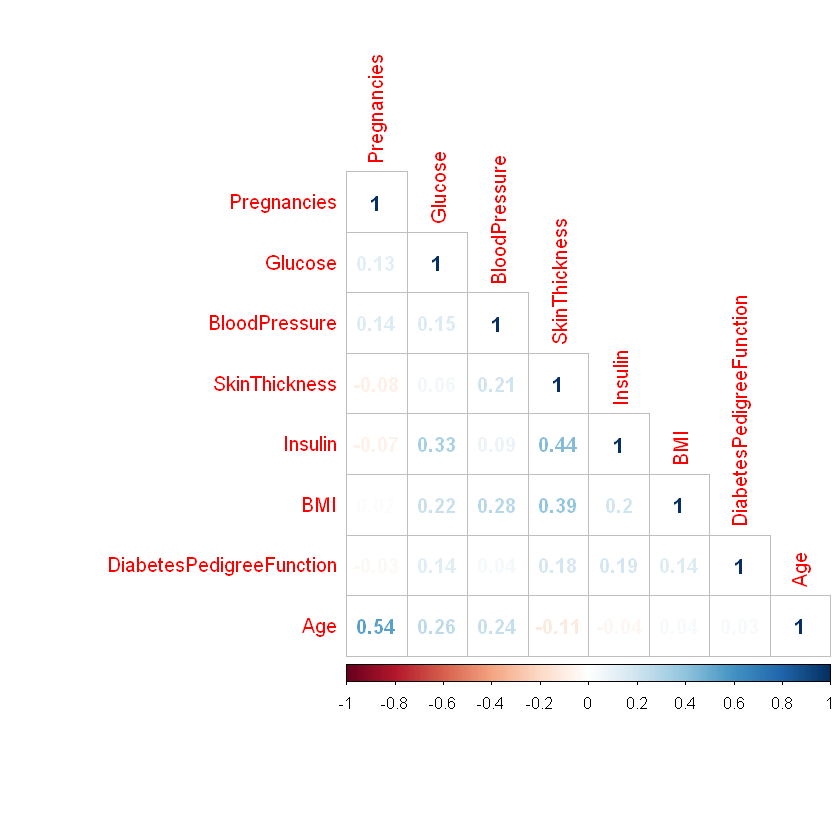

In [17]:
corrplot(cor(diabetes[, -9]), type = "lower", method = "number")

In [44]:
nrows <- NROW(diabetes)
set.seed(218)                           # fix random value
index <- sample(1:nrows, 0.7 * nrows)   # shuffle and divide
# train <- diab                         # 768 test data (100%)
train <- diabetes[index,]                   # 537 test data (70%)
test <- diabetes[-index,]                   # 231 test data (30%)

In [41]:

# Training The Model
glm_m1 <- glm(Diabetes ~., data = train, family = binomial)
summary(glm_m1)


Call:
glm(formula = Diabetes ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6370  -0.7155  -0.4053   0.7369   2.7405  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.8602505  0.9007060  -9.837  < 2e-16 ***
Pregnancies               0.1350774  0.0382758   3.529 0.000417 ***
Glucose                   0.0313421  0.0043035   7.283 3.27e-13 ***
BloodPressure            -0.0122181  0.0058744  -2.080 0.037537 *  
SkinThickness            -0.0009409  0.0082308  -0.114 0.908988    
Insulin                  -0.0006212  0.0010400  -0.597 0.550328    
BMI                       0.1053255  0.0188976   5.573 2.50e-08 ***
DiabetesPedigreeFunction  1.0408221  0.3586892   2.902 0.003711 ** 
Age                       0.0211476  0.0113075   1.870 0.061453 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1

The result shows that the variables Triceps_Skin, Serum_Insulin and Age are not statiscally significance. In other words, the p_values is greather than 0.01. Therefore they will be removed.

In [42]:
glm_m2 <- update(glm_m1, ~. - Triceps_Skin - Serum_Insulin - Age )
summary(glm_m2)


Call:
glm(formula = Diabetes ~ Pregnancies + Glucose + BloodPressure + 
    SkinThickness + Insulin + BMI + DiabetesPedigreeFunction, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6839  -0.7389  -0.4109   0.7206   2.8315  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.5025055  0.8681475  -9.794  < 2e-16 ***
Pregnancies               0.1698351  0.0338150   5.022 5.10e-07 ***
Glucose                   0.0331859  0.0042176   7.868 3.59e-15 ***
BloodPressure            -0.0106404  0.0058004  -1.834  0.06659 .  
SkinThickness            -0.0020369  0.0080990  -0.251  0.80143    
Insulin                  -0.0007558  0.0010262  -0.737  0.46138    
BMI                       0.1027175  0.0187621   5.475 4.38e-08 ***
DiabetesPedigreeFunction  1.0632816  0.3575601   2.974  0.00294 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parame

In [10]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [43]:
glm_probs <- predict(glm_m2, newdata = testing, type = "response")
glm_pred <- ifelse(glm_probs > 0.5, 1, 0)
#print("Confusion Matrix for logistic regression"); table(Predicted = glm_pred, Actual = test$Diabetes)
confusionMatrix(glm_pred, testing$Outcome ) # Confusion Matrix for logistic regression

ERROR: Error: `data` and `reference` should be factors with the same levels.


In [22]:
n <- nrow(diabetes)
train <- sample(n, trunc(0.70*n))
training <- diabetes[train, ]
testing <- diabetes[-train, ]


In [ ]:
OutlierDetection(x, k = 0.05 * nrow(x), cutoff = 0.95,
  Method = "euclidean", rnames = FALSE, depth = FALSE,
  dense = FALSE, distance = FALSE, dispersion = FALSE)

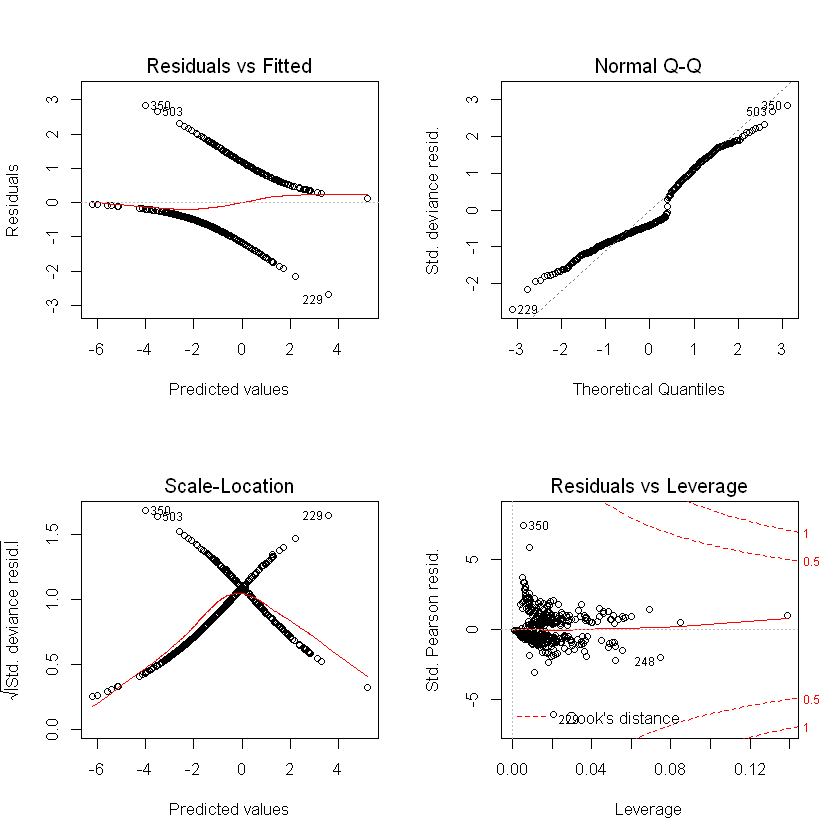

In [31]:
par(mfrow = c(2,2))
plot(glm_m2)

In [20]:
prop.table(table(train$diabetes))


       No       Yes 
0.6536313 0.3463687 

In [11]:
method <- paste0(paste(names(diabetes)[length(diabetes)], collapse="+") ,"~", paste(names(diabetes)[1:(length(diabetes)-1)], collapse="+"))
logistic <- glm(formula = method, family=binomial, data=diabetes)
logistic


Call:  glm(formula = method, family = binomial, data = diabetes)

Coefficients:
             (Intercept)               Pregnancies                   Glucose  
               -8.404696                  0.123182                  0.035164  
           BloodPressure             SkinThickness                   Insulin  
               -0.013296                  0.000619                 -0.001192  
                     BMI  DiabetesPedigreeFunction                       Age  
                0.089701                  0.945180                  0.014869  

Degrees of Freedom: 767 Total (i.e. Null);  759 Residual
Null Deviance:	    993.5 
Residual Deviance: 723.4 	AIC: 741.4

In [12]:
summary(logistic)


Call:
glm(formula = method, family = binomial, data = diabetes)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5566  -0.7274  -0.4159   0.7267   2.9297  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.4046964  0.7166359 -11.728  < 2e-16 ***
Pregnancies               0.1231823  0.0320776   3.840 0.000123 ***
Glucose                   0.0351637  0.0037087   9.481  < 2e-16 ***
BloodPressure            -0.0132955  0.0052336  -2.540 0.011072 *  
SkinThickness             0.0006190  0.0068994   0.090 0.928515    
Insulin                  -0.0011917  0.0009012  -1.322 0.186065    
BMI                       0.0897010  0.0150876   5.945 2.76e-09 ***
DiabetesPedigreeFunction  0.9451797  0.2991475   3.160 0.001580 ** 
Age                       0.0148690  0.0093348   1.593 0.111192    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)



# features selection 
- highest logistic model coefficients

In [13]:
Model_coeff <- exp(coef(logistic))[2:ncol(diabetes)]
Model_coeff <- Model_coeff[c(order(Model_coeff,decreasing=TRUE)[1:(ncol(diabetes)-1)])]
predictors_names <- c(names(Model_coeff),names(diabetes)[length(diabetes)])

In [14]:
predictors_names

[1] "DiabetesPedigreeFunction" "Pregnancies"             
[3] "BMI"                      "Glucose"                 
[5] "Age"                      "SkinThickness"           
[7] "Insulin"                  "BloodPressure"           
[9] "Diabetes"

In [15]:
# filter df with n most important predictors
diabetes_df <- diabetes[,c(predictors_names)]
head(diabetes_df)

DiabetesPedigreeFunction,Pregnancies,BMI,Glucose,Age,SkinThickness,Insulin,BloodPressure,Diabetes
0.627,6,33.6,148,50,35,0,72,1
0.351,1,26.6,85,31,29,0,66,0
0.672,8,23.3,183,32,0,0,64,1
0.167,1,28.1,89,21,23,94,66,0
2.288,0,43.1,137,33,35,168,40,1
0.201,5,25.6,116,30,0,0,74,0


In [16]:
names(diabetes_df)

[1] "DiabetesPedigreeFunction" "Pregnancies"             
[3] "BMI"                      "Glucose"                 
[5] "Age"                      "SkinThickness"           
[7] "Insulin"                  "BloodPressure"           
[9] "Diabetes"

In [17]:
intrain <- createDataPartition(y=diabetes_df$Diabetes,p=0.7,list=FALSE)
training <- diabetes_df[intrain,]
testing<-diabetes_df[-intrain,]

formula <- paste0(paste(names(diabetes_df)[length(diabetes_df)], collapse="+") ,"~", paste(names(diabetes_df)[1:(length(diabetes_df)-1)], collapse="+"))

In [22]:
install.packages("partykit")
library("partykit")

also installing the dependency 'inum'



package 'inum' successfully unpacked and MD5 sums checked
package 'partykit' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpoxxEgc\downloaded_packages


Warning message:
"package 'partykit' was built under R version 3.6.3"Loading required package: grid
Loading required package: libcoin
Warning message:
"package 'libcoin' was built under R version 3.6.3"Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.6.3"

In [25]:
## Predict Diabites Risk on new patients
ct <- ctree(Diabetes ~ ., data = training)
prediction_probability <- predict(ct, testing,type = c("prob"))
prediction_class <- predict(ct, testing,type = c("response"))
table(prediction_class, testing$Diabetes )

                
prediction_class   0   1
               0 126  45
               1  24  35

In [28]:
con_m <- confusionMatrix(testing$Diabetes, prediction_class, positive = NULL, 
                 dnn = c("Prediction", "References"))
con_m

Confusion Matrix and Statistics

          References
Prediction   0   1
         0 126  24
         1  45  35
                                          
               Accuracy : 0.7             
                 95% CI : (0.6363, 0.7585)
    No Information Rate : 0.7435          
    P-Value [Acc > NIR] : 0.94165         
                                          
                  Kappa : 0.2956          
                                          
 Mcnemar's Test P-Value : 0.01605         
                                          
            Sensitivity : 0.7368          
            Specificity : 0.5932          
         Pos Pred Value : 0.8400          
         Neg Pred Value : 0.4375          
             Prevalence : 0.7435          
         Detection Rate : 0.5478          
   Detection Prevalence : 0.6522          
      Balanced Accuracy : 0.6650          
                                          
       'Positive' Class : 0               
                             

# Neural Network

In [14]:
if(!require(tidyverse)) install.packages("tidyverse", repos = "http://cran.us.r-project.org")
if(!require(caret)) install.packages("caret", repos = "http://cran.us.r-project.org")
if(!require(neuralnet)) install.packages("neuralnet", repos = "http://cran.us.r-project.org")
if(!require(corrplot)) install.packages("corrplot", repos = "http://cran.us.r-project.org")
if(!require(gridExtra)) install.packages("gridExtra", repos = "http://cran.us.r-project.org")
if(!require(ggthemes)) install.packages("ggthemes", repos = "http://cran.us.r-project.org")

library(tidyverse)
library(caret)
library(corrplot)
library(gridExtra)
library(ggplot2)
library(ggthemes)
library(neuralnet)

Loading required package: neuralnet


package 'neuralnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpcbFMA6\downloaded_packages


Loading required package: corrplot
corrplot 0.84 loaded
Loading required package: gridExtra

Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Loading required package: ggthemes

Attaching package: 'neuralnet'

The following object is masked from 'package:dplyr':

    compute



In [15]:
sapply(diabetes, function(x) sum(is.na(x)))

Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0

In [16]:
head(diabetes)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


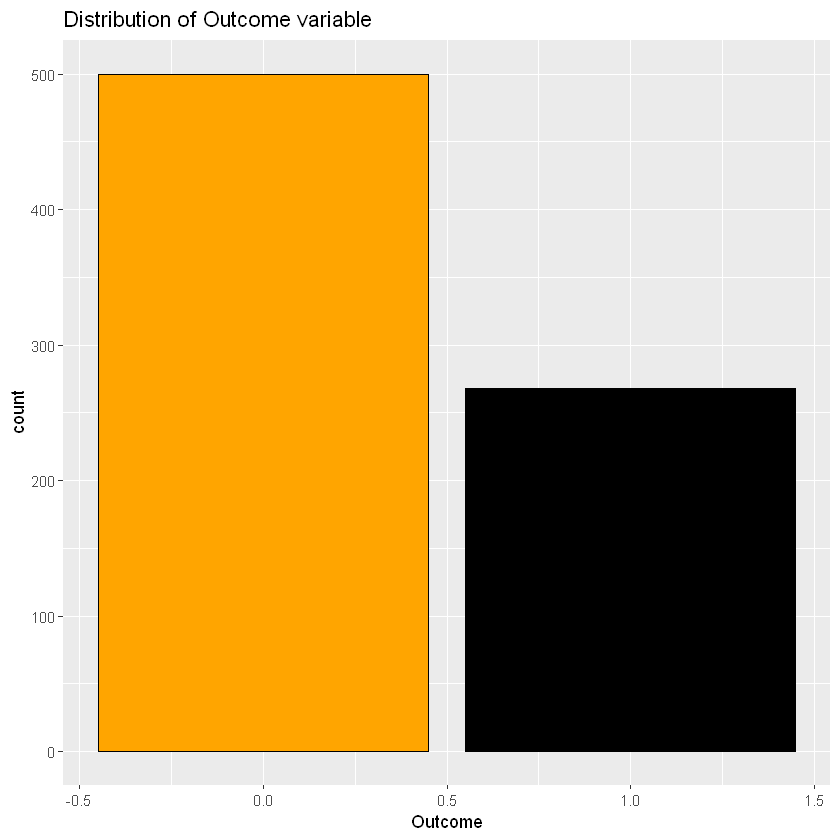

In [21]:
# We need to predict the diabetic indicator
# We can see the data is a near 50/50 split between
# diabetic and non-diabetic
ggplot(diabetes,aes(Outcome,fill = as.factor(Outcome))) +
  geom_bar(colour="black") + 
  scale_fill_manual(values=c("orange", "black")) +
  guides(fill=FALSE) +
  ggtitle("Distribution of Outcome variable")

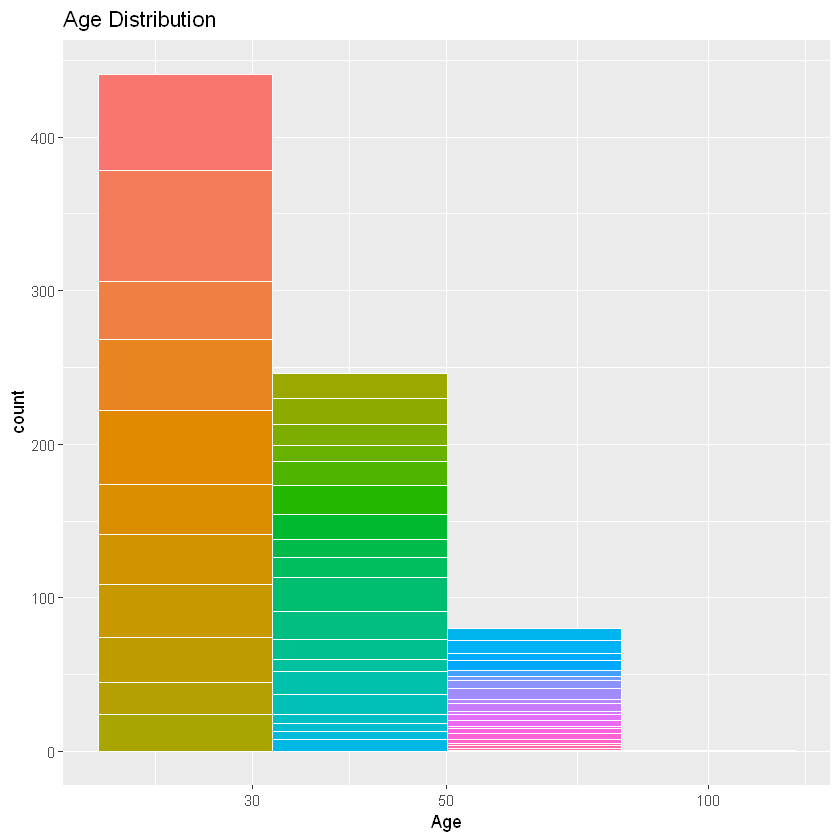

In [25]:
# The data contains a fair distribution of age groups, most being under 30
# with a second large group between 30 and 50 years of age
diabetes %>%
  ggplot(aes(Age)) + 
  geom_histogram(bins = 30, binwidth=0.2, color="white", show.legend = FALSE, aes(fill = cut(Age, 100))) + 
  scale_x_log10() + 
  ggtitle("Age Distribution")


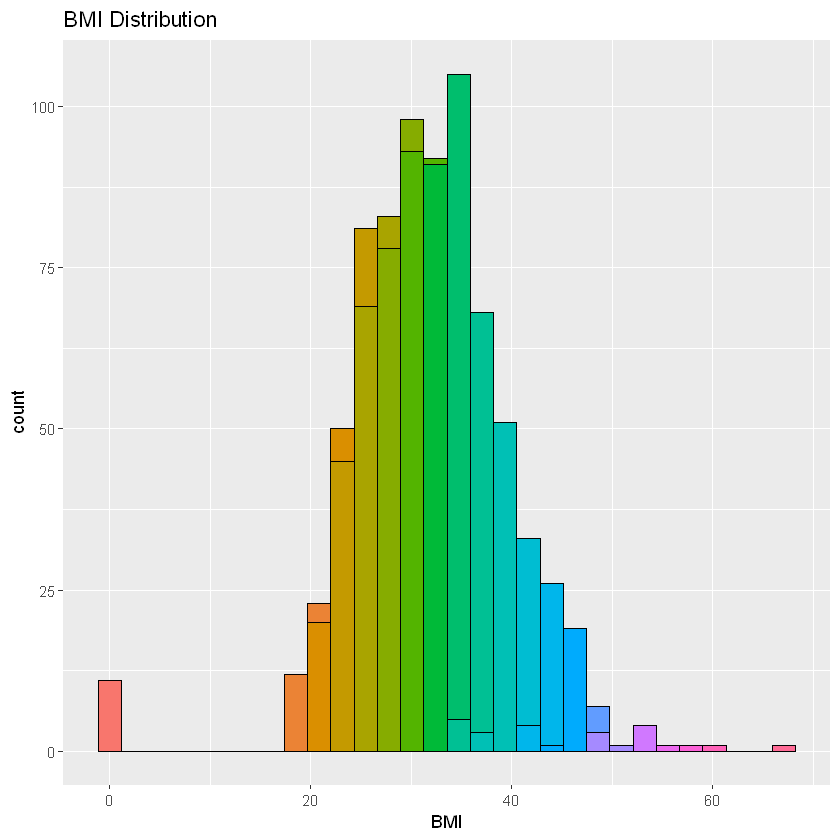

In [26]:
diabetes %>%
  ggplot(aes(BMI)) + 
  geom_histogram(bins = 30, color="black", show.legend = FALSE, aes(fill = cut(BMI, 30))) + 
  ggtitle("BMI Distribution")

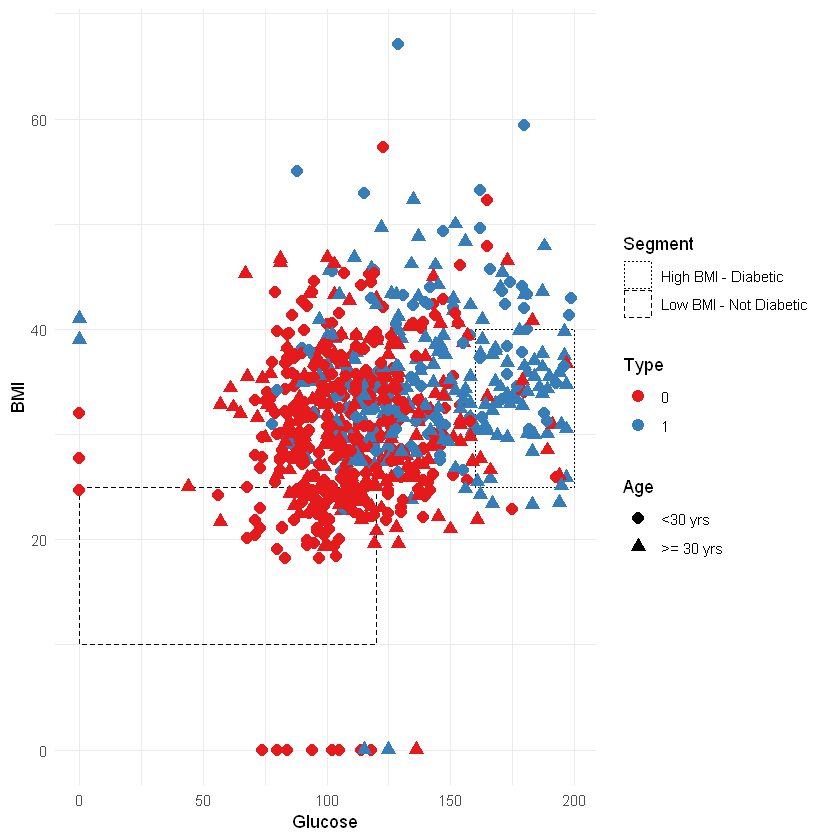

In [29]:
d<-diabetes
d$Age <- ifelse(d$Age < 30, "<30 yrs", ">= 30 yrs")

ggplot(d, aes(x = Glucose, y = BMI)) +
  geom_rect(aes(linetype = "High BMI - Diabetic"), xmin = 160, ymax = 40, fill = NA, xmax = 200, 
            ymin = 25, col = "black") + 
  geom_rect(aes(linetype = "Low BMI - Not Diabetic"), xmin = 0, ymax = 25, fill = NA, xmax = 120, 
            ymin = 10, col = "black") + 
  geom_point(aes(col = factor(Outcome), shape = factor(Age)), size = 3) +
  scale_color_brewer(name = "Type", palette = "Set1") +
  scale_shape(name = "Age") +
  scale_linetype_manual(values = c("High BMI - Diabetic" = "dotted", "Low BMI - Not Diabetic" = "dashed"),
                        name = "Segment") + theme_minimal()

In [60]:
set.seed(42)
test_index <- createDataPartition(y = diabetes$Outcome, times = 1, p = 0.2, list = FALSE)
train <- diabetes[-test_index,]
test <- diabetes[test_index,]

In [55]:
X1 <- names(train)
formula <- as.formula(paste("Outcome ~", paste(X1[!X1 %in% "Outcome"], collapse = " + ")))

In [61]:
#train model using a single hidden node of 8 neurons
Neural_net <- neuralnet(formula,data=train,hidden=c(8),linear.output=FALSE, threshold = 0.06)

In [62]:
# Compute predictions 
predicted_Neural_net_values <- compute(Neural_net,test[,1:8])

In [63]:
# Review deep network 
plot(predicted_Neural_net_values)

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' is a list, but does not have components 'x' and 'y'


In [64]:
summarization = confusionMatrix(as.factor(round(predicted_Neural_net_values$net.result)), as.factor(test[,9]))
summarization 

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 86 17
         1 16 35
                                          
               Accuracy : 0.7857          
                 95% CI : (0.7124, 0.8477)
    No Information Rate : 0.6623          
    P-Value [Acc > NIR] : 0.0005551       
                                          
                  Kappa : 0.5187          
                                          
 Mcnemar's Test P-Value : 1.0000000       
                                          
            Sensitivity : 0.8431          
            Specificity : 0.6731          
         Pos Pred Value : 0.8350          
         Neg Pred Value : 0.6863          
             Prevalence : 0.6623          
         Detection Rate : 0.5584          
   Detection Prevalence : 0.6688          
      Balanced Accuracy : 0.7581          
                                          
       'Positive' Class : 0               
                                    

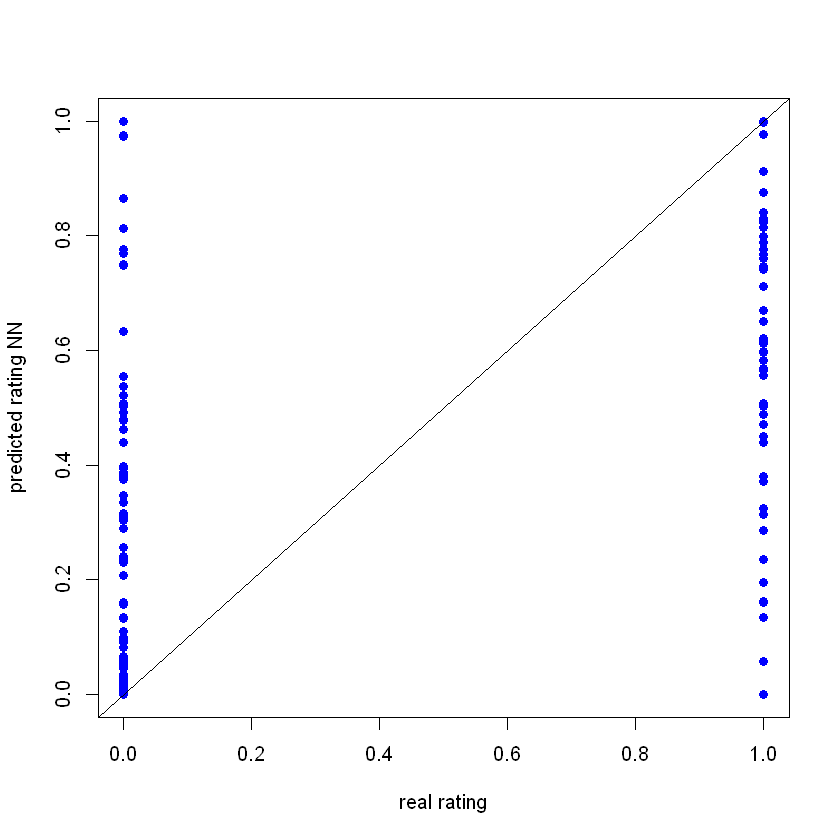

In [66]:

# Compare the predicted rating with real rating using visualization. Looks fantastic.
plot(test$Outcome, predicted_Neural_net_values$net.result, col='blue', pch=16, ylab = "predicted rating NN", xlab = "real rating")
abline(0,1)

In [67]:
rmse = (sum((test$Outcome - predicted_Neural_net_values$net.result)^2) / nrow(validation)) ^ 0.5
rmse


[1] 0.5664487

In [ ]:
https://towardsdatascience.com/machine-learning-with-the-diabetes-data-set-in-r-11fa7ae944d0

https://rpubs.com/jayarapm/PIMAIndianWomenDiabetes